In [ ]:
!nvidia-smi

Fri Jun  4 13:12:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!7z x /content/gdrive/MyDrive/Deep\ Learning/archive.zip

import zipfile
zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/Dissertation/plant disease identification dataset (updated).zip",'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
!pip install torchsummary

In [ ]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

In [ ]:
!pip install mlflow

     |████████████████████████████████| 14.2MB 216kB/s 
     |████████████████████████████████| 153kB 55.4MB/s 
     |████████████████████████████████| 1.1MB 40.9MB/s 
     |████████████████████████████████| 174kB 57.3MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 81kB 12.5MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
  Created wheel for prometheus-flask-exporter: filename=prometheus_flask_exporter-0.18.2-cp37-none-any.whl size=17415 sha256=74e12afd01f3f9f937a5c7d65701df66add8c41b24765f8e432b53c235be9f86
  Stored in directory: /root/.cache/pip/wheels/c0/e2/9c/4f3ee23964802940f81a8b476d0b9be6fb6348cb12df2e2226
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158170 sha256=03c6a4839f6308b798d50a014fa3b7f5ba9804d39ea0c8a696709647c6558f00
  Stored in directory: /root/.cache/pip/wheels/8

In [ ]:
import mlflow
import mlflow.pytorch

## Data Load

In [ ]:
data_dir = "plant disease identification dataset (updated)"
diseases = os.listdir(data_dir)
print(diseases)

['Apple___Apple_scab', 'Grape___Black_rot', 'Apple___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___healthy', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Squash___Powdery_mildew', 'Tomato___Early_blight', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Soybean___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Blueberry___healthy', 'Apple___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Septoria_leaf_spot', 'Peach___Bacterial_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Potato___Late_blight', 'Tomato___healthy', 'Tomato___Target_Spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Peach___healthy', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_

In [ ]:
print("Total disease classes are:", len(diseases))

Total disease classes are: 38


In [ ]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [ ]:
# unique plants in the dataset
print(f"Unique Plants are: {len(plants)} \n{plants}")

print("Number of diseases: {}".format(NumberOfDiseases))

Unique Plants are: 14 
['Apple', 'Grape', 'Orange', 'Potato', 'Pepper,_bell', 'Squash', 'Tomato', 'Cherry_(including_sour)', 'Soybean', 'Strawberry', 'Blueberry', 'Corn_(maize)', 'Peach', 'Raspberry']
Number of diseases: 26


In [ ]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(data_dir+'/'+ disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
print(img_per_class)

                                                    no. of images
Apple___Apple_scab                                           2523
Grape___Black_rot                                            2360
Apple___healthy                                              2510
Orange___Haunglongbing_(Citrus_greening)                     2513
Potato___healthy                                             2282
Pepper,_bell___healthy                                       2485
Potato___Early_blight                                        2429
Squash___Powdery_mildew                                      2170
Tomato___Early_blight                                        2406
Cherry_(including_sour)___Powdery_mildew                     2104
Grape___healthy                                              2115
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   2152
Soybean___healthy                                            2527
Strawberry___Leaf_scorch                                     2218
Tomato___B

In [ ]:
#plt.style.use("grayscale")

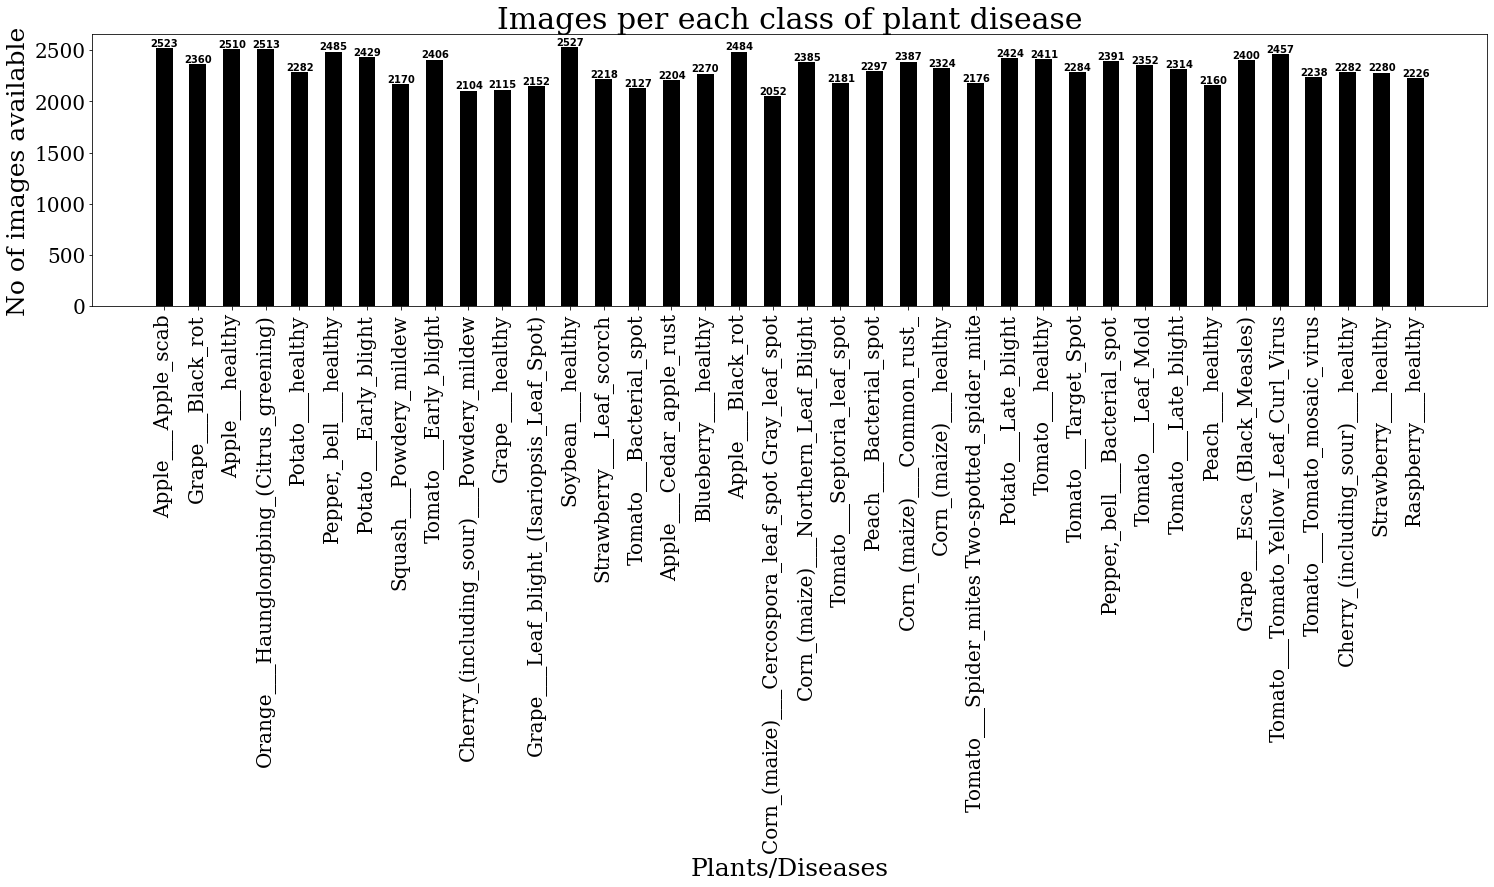

In [ ]:
# plotting number of images available for each disease
from matplotlib import rc
index = [n for n in range(38)]
plt.figure(figsize=(25, 5))
plt.bar(index, [n for n in nums.values()], width=0.5, color = ['black'])
#rc('font',**{'family':'serif','serif':['Times']})
plt.xlabel('Plants/Diseases', fontsize=25, fontname = 'serif')
plt.ylabel('No of images available', fontsize=25, fontname = 'serif')
plt.xticks(index, diseases, fontsize=20, fontname = 'serif',rotation=90)
plt.yticks(fontsize = 20, fontname = 'serif')
plt.title('Images per each class of plant disease', fontsize = 30, fontname = 'serif')
for i, v in enumerate(nums.values()):
    plt.text( i-0.4,v+20, str(v), fontweight = 'bold')

In [ ]:
total_imgs = img_per_class["no. of images"].sum()
print(f"There are {total_imgs} images")

There are 87900 images


In [ ]:
siz = 224
transform1 = transforms.Compose([transforms.Resize(siz),transforms.ToTensor()])
data = ImageFolder(data_dir, transform=transform1)
data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
img, label = data[0]
print(img.shape, label)

torch.Size([3, 224, 224]) 0


In [ ]:
len(data.classes)

38

In [ ]:
# for checking some images from dataset
def show_image(image, label):
    print("Label: " + data.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

Label: Apple___Apple_scab(0)


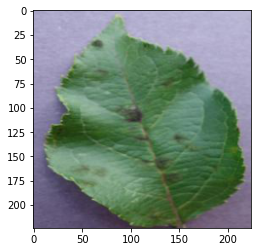

In [ ]:
show_image(*data[0])

In [ ]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed)

In [ ]:
class Params(object):
    def __init__(self, batch_size, epochs,lr = 0.001,   #grad_clip = None, weight_decay = 0, 
                 momentum = 0.9, opt_func = torch.optim.SGD):
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr
       # self.grad_clip = grad_clip
       # self.weight_decay = weight_decay
        self.opt_func = opt_func
        self.momentum = momentum

In [ ]:
args = Params(batch_size = 32, epochs = 25)

In [ ]:
data_dl = DataLoader(data, args.batch_size, shuffle=True, num_workers=2, pin_memory=True)

## Train test valid split

In [ ]:
num_train = int(total_imgs*0.7) +1
num_val = int(total_imgs*0.1)
num_test = int(total_imgs*0.2) 

print(num_train+num_val+num_test)

train_ds, valid_ds, test_ds = torch.utils.data.random_split(data_dl.dataset,(num_train,num_val,num_test))

87900


In [ ]:
print(len(train_ds.indices),len(test_ds),len(valid_ds))

61530 17580 8790


In [ ]:
print(train_ds.indices[:10] , valid_ds.indices[:10], test_ds.indices[:10])

'''
([50415, 31801, 20841, 12647, 45175, 54352, 30605, 48320, 74316, 57329],
 [52881, 67688, 74955, 29138, 85346, 83961, 63688, 40776, 43841, 72548],
 [13364, 63773, 32184, 81918, 28516, 74071, 25037, 11591, 44989, 19873])
'''

[50415, 31801, 20841, 12647, 45175, 54352, 30605, 48320, 74316, 57329] [52881, 67688, 74955, 29138, 85346, 83961, 63688, 40776, 43841, 72548] [13364, 63773, 32184, 81918, 28516, 74071, 25037, 11591, 44989, 19873]


'\n([50415, 31801, 20841, 12647, 45175, 54352, 30605, 48320, 74316, 57329],\n [52881, 67688, 74955, 29138, 85346, 83961, 63688, 40776, 43841, 72548],\n [13364, 63773, 32184, 81918, 28516, 74071, 25037, 11591, 44989, 19873])\n'

In [ ]:
num_cl = np.zeros((38,), dtype=int)
for img,lb in train_ds:
    num_cl[lb] = num_cl[lb] +1

print(num_cl)


[1758 1761 1556 1758 1625 1490 1549 1393 1699 1670 1636 1640 1663 1520
 1486 1753 1607 1518 1655 1767 1679 1692 1588 1591 1767 1526 1527 1591
 1498 1664 1604 1679 1515 1506 1639 1727 1568 1665]


In [ ]:

num_cl2 = np.zeros((38,), dtype=int)
for img,lb in valid_ds:
    num_cl2[lb] = num_cl2[lb] +1

print(num_cl2)

num_cl3 = np.zeros((38,), dtype=int)
for img,lb in test_ds:
    num_cl3[lb] = num_cl3[lb] +1

print(num_cl3)


[231 232 218 275 205 189 242 216 218 247 235 219 246 217 219 246 221 228
 244 252 243 245 239 206 260 202 243 227 196 259 265 212 224 235 228 229
 225 252]
[534 491 430 477 440 425 491 443 470 468 453 501 491 415 410 514 469 414
 492 466 507 487 455 429 500 442 448 462 433 483 445 461 442 435 417 501
 445 494]


In [ ]:
#plot

In [ ]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        print(labels)
        break

In [ ]:
train_dl = DataLoader(train_ds, args.batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid_ds, args.batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_ds, args.batch_size, shuffle=True, num_workers=2, pin_memory=True)

In [ ]:
# Images for first batch of training
show_batch(train_dl) 

#34, 18, 30,  1, 29, 23, 17, 27, 22, 11,  6, 20, 36, 23, 33, 25, 10, 30,36, 14, 19, 27, 20, 16,  4, 23, 19, 20, 30, 36, 25,  9]

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print(train_ds)
print(train_dl)

In [ ]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)
test_dl = DeviceDataLoader(test_dl,device)

#Models

## VGG 11 13 16 19

In [ ]:
#VGG16 = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M']
# Then flatten and 4096 x 4096 x 38 linear layers

VGG_types = {
    'VGG11': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG13': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'VGG16': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'VGG19': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M']
}

In [ ]:
class VGG_net(nn.Module):
    def __init__(self, in_channels = 3, num_classes = 38):
        super(VGG_net, self).__init__()
        self.in_channels = in_channels
        self.conv_layers = self.create_conv_layers(VGG_types['VGG11'])

        self.fcs = nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(p = 0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096, num_classes)
            )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fcs(x)
        return x

    def create_conv_layers(self, architecture):
        layers = []
        in_channels = self.in_channels

        for x in architecture:
            if type(x) == int:
                out_channels = x

                layers += [nn.Conv2d(in_channels = in_channels, 
                                     out_channels = out_channels, 
                                     kernel_size = (3,3), stride = (1,1),
                                     padding = (1,1)), nn.BatchNorm2d(x), 
                           nn.ReLU()]
                in_channels = x
            elif x =='M':
                layers += [nn.MaxPool2d(kernel_size = (2,2), stride = (2,2))]
        return nn.Sequential(*layers)

In [ ]:
model1 = VGG_net(in_channels = 3, num_classes = 38)
x1 = torch.randn(1, 3, 224, 224)
model1(x1)
print(model1(x1).shape)

torch.Size([1, 38])


In [ ]:
# defining the model and moving it to the GPU
model = to_device(VGG_net(3, len(data.classes)), device) 
model

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=(2, 2), str

In [ ]:
# getting summary of the model

INPUT_SHAPE = (3, 224, 224)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
       BatchNorm2d-6        [-1, 128, 112, 112]             256
              ReLU-7        [-1, 128, 112, 112]               0
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
      BatchNorm2d-10          [-1, 256, 56, 56]             512
             ReLU-11          [-1, 256, 56, 56]               0
           Conv2d-12          [-1, 256, 56, 56]         590,080
      BatchNorm2d-13          [-1, 256, 56, 56]             512
             ReLU-14          [-1, 256,

## Google Net

In [ ]:
class Inception_block(nn.Module):
    def __init__(self, in_channels, out_1x1, red_3x3, out_3x3, red_5x5, out_5x5, out_1x1pool):
        super(Inception_block, self).__init__()

        self.branch1 = conv_block(in_channels, out_1x1, kernel_size = 1)

        self.branch2 = nn.Sequential(
            conv_block(in_channels, red_3x3, kernel_size = 1),
            conv_block(red_3x3, out_3x3, kernel_size = 3, padding = 1)
        )

        self.branch3 = nn.Sequential(
            conv_block(in_channels, red_5x5, kernel_size = 1),
            conv_block(red_5x5, out_5x5, kernel_size = 5, padding = 2)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size = 3, stride = 1, padding = 1),
            conv_block(in_channels, out_1x1pool, kernel_size = 1)
        )

    def forward(self, x):
        return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x), self.branch4(x)], 1)

class conv_block(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super(conv_block, self).__init__()
        self.relu = nn.ReLU()
        self.conv = nn.Conv2d(in_channels, out_channels, **kwargs)
        self.batchnorm = nn.BatchNorm2d(out_channels)
    
    def forward(self, x):
        return self.relu(self.batchnorm(self.conv(x)))


In [ ]:
# add GoogleNet here
class GoogleNet(nn.Module):
    def __init__(self, in_channels = 3, num_classes = 38):
        super(GoogleNet, self).__init__()

        self.conv1 = conv_block(in_channels = in_channels, out_channels = 64, kernel_size = (7,7), stride = (2,2), padding = (3,3))

        self.maxpool1 = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        #self.conv2 = conv_block(64, 64, kernel_size=1, stride = 1)

        self.conv2 = conv_block(64, 192, kernel_size = 3, stride = 1, padding = 1)
        self.maxpool2 = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.inception3a = Inception_block(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception_block(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.inception4a = Inception_block(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception_block(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception_block(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception_block(512, 112, 144, 288, 32, 64, 64)
        self.inception4e = Inception_block(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.inception5a = Inception_block(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception_block(832, 384, 192, 384, 48, 128, 128)

        self.avgpool = nn.AvgPool2d(kernel_size = 7, stride = 1)
        self.dropout = nn.Dropout(p = 0.4)
        self.fc1 = nn.Linear(1024, 38)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)
        x = self.inception4e(x)
        x = self.maxpool4(x)

        x = self.inception5a(x)
        x = self.inception5b(x)
        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.dropout(x)
        x = self.fc1(x)
        return x




In [ ]:
# defining the model and moving it to the GPU
model = to_device(GoogleNet(3, len(data.classes)), device) 
model

GoogleNet(
  (conv1): conv_block(
    (relu): ReLU()
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv2): conv_block(
    (relu): ReLU()
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (batchnorm): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (inception3a): Inception_block(
    (branch1): conv_block(
      (relu): ReLU()
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
      (batchnorm): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (branch2): Sequential(
      (0): conv_block(
        (relu): ReLU()
        (conv): Conv2d(192, 96, kernel_size

In [ ]:
# getting summary of the model

INPUT_SHAPE = (3, 224, 224)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
        conv_block-4         [-1, 64, 112, 112]               0
         MaxPool2d-5           [-1, 64, 56, 56]               0
            Conv2d-6          [-1, 192, 56, 56]         110,784
       BatchNorm2d-7          [-1, 192, 56, 56]             384
              ReLU-8          [-1, 192, 56, 56]               0
        conv_block-9          [-1, 192, 56, 56]               0
        MaxPool2d-10          [-1, 192, 28, 28]               0
           Conv2d-11           [-1, 64, 28, 28]          12,352
      BatchNorm2d-12           [-1, 64, 28, 28]             128
             ReLU-13           [-1, 64, 28, 28]               0
       conv_block-14           [-1, 64,

## AlexNet

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, in_channels, 
                 num_classes = 38):
        super(AlexNet, self).__init__()

        self.convolutional = nn.Sequential(
                    nn.Conv2d(3, 96, kernel_size = 11, stride = 4, padding = 2),
                    nn.ReLU(inplace = True),
                    nn.MaxPool2d(kernel_size = 3, stride = 2),

                    nn.Conv2d(96, 256, kernel_size = 5, stride = 1, padding = 2),
                    nn.ReLU(inplace = True),
                    nn.MaxPool2d(kernel_size = 3, stride = 2),

                    nn.Conv2d(256, 384, kernel_size = 3, stride = 1, padding = 1),
                    nn.ReLU(inplace = True),

                    nn.Conv2d(384, 384, kernel_size = 3, stride = 1, padding = 1),
                    nn.ReLU(inplace = True),

                    nn.Conv2d(384, 256, kernel_size = 3, stride = 1, padding = 1),
                    nn.ReLU(inplace = True),

                    nn.MaxPool2d(kernel_size = 3, stride = 2),      
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.linear = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace = True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace = True),

            nn.Linear(4096, 38),
        )

    def forward(self, x):
        x = self.convolutional(x)
        x = self.avgpool(x)

        x = torch.flatten(x, 1)
        x = self.linear(x)

        return x

In [ ]:
# defining the model and moving it to the GPU
model = to_device(AlexNet(3, len(data.classes)), device) 
model

AlexNet(
  (convolutional): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (linear): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)


In [ ]:
# getting summary of the model

INPUT_SHAPE = (3, 224, 224)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
         MaxPool2d-3           [-1, 96, 27, 27]               0
            Conv2d-4          [-1, 256, 27, 27]         614,656
              ReLU-5          [-1, 256, 27, 27]               0
         MaxPool2d-6          [-1, 256, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         885,120
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]       1,327,488
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         884,992
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

##ZFNet

In [ ]:
class ZFNet(nn.Module):
    def __init__(self, in_channels, num_classes = 38):
        super(ZFNet, self).__init__()

        self.convolutional = nn.Sequential(
                    nn.Conv2d(3, 96, kernel_size = 7, stride = 2, padding = 1),
                    nn.ReLU(inplace = True),
                    nn.MaxPool2d(kernel_size = 3, stride = 2),

                    nn.Conv2d(96, 256, kernel_size = 5, stride = 2, padding = 0),
                    nn.ReLU(inplace = True),
                    nn.MaxPool2d(kernel_size = 3, stride = 2),

                    nn.Conv2d(256, 512, kernel_size = 3, stride = 1, padding = 1),
                    nn.ReLU(inplace = True),

                    nn.Conv2d(512, 1024, kernel_size = 3, stride = 1, padding = 1),
                    nn.ReLU(inplace = True),

                    nn.Conv2d(1024, 512, kernel_size = 3, stride = 1, padding = 1),
                    nn.ReLU(inplace = True),

                    nn.MaxPool2d(kernel_size = 3, stride = 2),      
        )

        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.linear = nn.Sequential(
            nn.Dropout(),
            nn.Linear(512 * 6 * 6, 4096),
            nn.ReLU(inplace = True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace = True),

            nn.Linear(4096, 38),
        )

    def forward(self, x):
        x = self.convolutional(x)
        x = self.avgpool(x)

        x = torch.flatten(x, 1)
        x = self.linear(x)

        return x

In [ ]:
# defining the model and moving it to the GPU
model = to_device(ZFNet(3, len(data.classes)), device) 
model

ZFNet(
  (convolutional): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (linear): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=18432, out_features=4096, bias=True)
    (2): ReLU(inp

In [ ]:
# getting summary of the model

INPUT_SHAPE = (3, 224, 224)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 96, 110, 110]          14,208
              ReLU-2         [-1, 96, 110, 110]               0
         MaxPool2d-3           [-1, 96, 54, 54]               0
            Conv2d-4          [-1, 256, 25, 25]         614,656
              ReLU-5          [-1, 256, 25, 25]               0
         MaxPool2d-6          [-1, 256, 12, 12]               0
            Conv2d-7          [-1, 512, 12, 12]       1,180,160
              ReLU-8          [-1, 512, 12, 12]               0
            Conv2d-9         [-1, 1024, 12, 12]       4,719,616
             ReLU-10         [-1, 1024, 12, 12]               0
           Conv2d-11          [-1, 512, 12, 12]       4,719,104
             ReLU-12          [-1, 512, 12, 12]               0
        MaxPool2d-13            [-1, 512, 5, 5]               0
AdaptiveAvgPool2d-14            [-1, 51

## ResNet 50, 101, 152

In [ ]:
class block(nn.Module):
    def __init__(self, in_channels, out_channels, identity_downsample = None, stride = 1):
        super(block, self).__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1, stride = 1, padding = 0)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = stride, padding = 1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size = 1, stride = 1, padding = 0)
        self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)
        self.relu = nn.ReLU()
        self.identity_downsample = identity_downsample

    def forward(self, x):
        identity = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)
        
        if self.identity_downsample is not None:
            identity = self.identity_downsample(identity)
        
        x += identity
        x = self.relu(x)
        return x

class ResNet(nn.Module):  # [3, 4, 6, 3] , image_channels = no. of inputs channels
    def __init__(self, block, layers, image_channels, num_classes):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size = 7, stride = 2, padding = 3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        # ResNet layers
        self.layer1 = self._make_layer(block, layers[0], out_channels = 64, stride = 1)
        self.layer2 = self._make_layer(block, layers[1], out_channels = 128, stride = 2)
        self.layer3 = self._make_layer(block, layers[2], out_channels = 256, stride = 2)
        self.layer4 = self._make_layer(block, layers[3], out_channels = 512, stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512*4, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)
        return x

    def _make_layer(self, block, num_residual_blocks, out_channels, stride):
        identity_downsample = None
        layers = []

        if stride != 1 or self.in_channels != out_channels * 4:
            identity_downsample = nn.Sequential(nn.Conv2d(self.in_channels, out_channels*4, kernel_size = 1,
                                                          stride = stride),
                                                nn.BatchNorm2d(out_channels*4))
            layers.append(block(self.in_channels, out_channels, identity_downsample, stride))
            self.in_channels = out_channels*4  #256

            for i in range(num_residual_blocks - 1):
                layers.append(block(self.in_channels, out_channels)) # out_channels = 256 ->64, 64*4 (256) again

            return nn.Sequential(*layers)

def ResNet50(img_channels = 3, num_classes = 38):
    return ResNet(block, [3, 4, 6, 3], img_channels, num_classes)

def ResNet101(img_channels = 3, num_classes = 38):
    return ResNet(block, [3, 4, 23, 3], img_channels, num_classes)

def ResNet152(img_channels = 3, num_classes = 38):
    return ResNet(block, [3, 8, 36, 3], img_channels, num_classes)

def test():
    net = ResNet152()
    x = torch.randn(2, 3, 224, 224)
    y = net(x).to('cuda')
    print(y.shape)

test()

torch.Size([2, 38])


In [ ]:
# defining the model and moving it to the GPU
model = to_device(ResNet152(3, len(data.classes)), device) 
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): block(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (identity_downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tr

In [ ]:
# getting summary of the model

INPUT_SHAPE = (3, 224, 224)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,160
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,928
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,640
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,640
      BatchNorm2d-14          [-1, 256,

# Training and Testing

In [ ]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))
    
def training_step(model, batch):
    images, labels = batch
    out = model(images)                  # Generate predictions
    loss = F.cross_entropy(out, labels) # Calculate loss
    return loss

def validation_step(model, batch):
    images, labels = batch
    out = model(images)                   # Generate prediction
    loss = F.cross_entropy(out, labels)  # Calculate loss
    acc = accuracy(out, labels)          # Calculate accuracy
    return {"val_loss": loss.detach(), "val_accuracy": acc}

def validation_epoch_end(model, outputs,log = False,loss = "loss", accuracy = "accuracy"):
    batch_losses = [x["val_loss"] for x in outputs]
    batch_accuracy = [x["val_accuracy"] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
    epoch_accuracy = torch.stack(batch_accuracy).mean()
    if log:
        mlflow.log_metric(loss,epoch_loss.data.item())
        mlflow.log_metric(accuracy,epoch_accuracy.data.item())
    return {"loss": epoch_loss, "accuracy": epoch_accuracy} # Combine accuracies

In [ ]:
%xmode Verbose

Exception reporting mode: Verbose


In [ ]:
# for training
@torch.no_grad()
def evaluate(model, val_loader,log = False, loss = "loss", accuracy = "accuracy"):
    model.eval()
    outputs = [validation_step(model,batch) for batch in val_loader]
    return validation_epoch_end(model,outputs,log,loss,accuracy)


def fit(epochs, lr, model, train_loader, val_loader, #weight_decay=0,grad_clip=None, 
        momentum = 0.9, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), lr, #weight_decay=weight_decay, 
                         momentum = momentum)
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
       
        for batch in train_loader:
            loss = training_step(model,batch)
            train_losses.append(loss)
            #mlflow.log_metric('training_loss', loss.data.item())
            loss.backward()
            
            # gradient clipping
            #if grad_clip: 
                #nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
        #validation
        result = evaluate(model, val_loader, True, 'val_loss', 'val_accuracy')
        train_result = evaluate(model, train_loader, True, 'train_loss', 'train_accuracy')
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, train_result['loss'], result['loss'], result['accuracy']))
        #history.append(result.cpu())
        


In [ ]:
%%time
history = [evaluate(model, valid_dl)]
print(history)

[{'loss': tensor(3.6375, device='cuda:0'), 'accuracy': tensor(0.0369)}]
CPU times: user 3.25 s, sys: 2.62 s, total: 5.87 s
Wall time: 24.1 s


In [ ]:
from sklearn import metrics

In [ ]:
def get_all_preds(model,loader):
    all_preds = torch.tensor([])
    true_lb = torch.tensor([])
    #all_preds = all_preds.cuda()
    #print(all_preds.is_cuda)
    #print(type(all_preds))
    
    for batch in loader:       
        torch.cuda.empty_cache() 
        with torch.no_grad():
            
            images,labels = batch
            preds = model(images)
            
            preds = preds.cpu()
            all_preds = torch.cat((all_preds,preds),dim=0)
            true_lb = torch.cat((true_lb,labels.cpu()),dim=0)

    print(true_lb)
    print(all_preds.argmax(dim=1))      
    return all_preds.argmax(dim=1),true_lb

In [ ]:
expt_id = mlflow.create_experiment('VGGNet-19_25')   #VGGNet-11_25,    VGGNet-13_25,  VGGNet-16_25
mlflow.set_experiment('VGGNet-19_25')

#args.grad_clip = None
#args.weight_decay = 0
#args.opt_func = opt_func
args.momentum = 0.9

for lr in [0.001]:
    for epochs in [25]:
        model = to_device(VGG_net(3, len(data.classes)), device)
        with mlflow.start_run() as run:
            args.epochs = epochs
            args.lr = lr
            
            for key, value in vars(args).items():
                mlflow.log_param(key, value)

            fit(args.epochs, args.lr, model, train_dl, valid_dl, #grad_clip=args.grad_clip, weight_decay= args.weight_decay,
                momentum = args.momentum, opt_func=args.opt_func)

            test_acc = evaluate(model, test_dl,True,'test_loss', 'test_accuracy')
            print(test_acc)
            #save_confusion_matrix(model,test_dl)
            
            data_preds,true_lb = get_all_preds(model,test_dl)

            y_true = true_lb.tolist()
            y_pred = data_preds.tolist()

            # Print the confusion matrix
            #print(metrics.confusion_matrix(y_true, y_pred))

            # Print the precision and recall, among other metrics
            report = metrics.classification_report(y_true, y_pred, digits=3)
            print(report)
           # mlflow.log_metric('f1-score', report['macro avg']['f1-score'])
            mlflow.pytorch.log_model(model, "models")



Epoch [0], train_loss: 1.2618, val_loss: 0.4515, val_acc: 0.8497
Epoch [1], train_loss: 0.3109, val_loss: 0.2297, val_acc: 0.9219
Epoch [2], train_loss: 0.1752, val_loss: 0.3411, val_acc: 0.8995
Epoch [3], train_loss: 0.1160, val_loss: 0.1656, val_acc: 0.9477
Epoch [4], train_loss: 0.0862, val_loss: 0.0914, val_acc: 0.9713
Epoch [5], train_loss: 0.0708, val_loss: 0.0920, val_acc: 0.9692
Epoch [6], train_loss: 0.0517, val_loss: 0.1030, val_acc: 0.9654
Epoch [7], train_loss: 0.0441, val_loss: 0.1183, val_acc: 0.9664
Epoch [8], train_loss: 0.0349, val_loss: 0.0297, val_acc: 0.9899
Epoch [9], train_loss: 0.0254, val_loss: 0.0497, val_acc: 0.9851
Epoch [10], train_loss: 0.0272, val_loss: 0.0398, val_acc: 0.9873
Epoch [11], train_loss: 0.0241, val_loss: 0.0522, val_acc: 0.9855
Epoch [12], train_loss: 0.0224, val_loss: 0.0264, val_acc: 0.9919
Epoch [13], train_loss: 0.0198, val_loss: 0.0300, val_acc: 0.9903
Epoch [14], train_loss: 0.0140, val_loss: 0.0327, val_acc: 0.9909
Epoch [15], train_lo

# Zipping mlruns folders

In [ ]:
!zip -r /content/mlrunsVGGnet_19_25.zip /content/mlruns

#!zip -r /content/mlrunsVGGnet_16_25.zip /content/mlruns
#!zip -r /content/mlrunsVGGnet_13_25.zip /content/mlruns
#!zip -r /content/mlrunsVGGnet_11_25.zip /content/mlruns

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/1/ (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/ (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/tags/ (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/tags/mlflow.user (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/tags/mlflow.source.name (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/tags/mlflow.log-model.history (deflated 40%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/tags/mlflow.source.type (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/artifacts/ (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/artifacts/models/ (stored 0%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/artifacts/models/conda.yaml (deflated 29%)
  adding: content/mlruns/1/3a8671b034434702b9fe046725c004e8/artifacts/models/MLmodel (deflated 38%)
  adding:

In [ ]:
# !cp /content/mlrunsVGGnet_11_25.zip /content/gdrive/MyDrive
#!cp /content/mlrunsVGGnet_13_25.zip /content/gdrive/MyDrive
#!cp /content/mlrunsVGGnet_16_25.zip /content/gdrive/MyDrive

!cp /content/mlrunsVGGnet_19_25.zip /content/gdrive/MyDrive

In [ ]:
# torch.save(model.state_dict(), '/content/trainedVGGnet_11_25.pth')
# torch.save(model.state_dict(), '/content/trainedVGGnet_13_25.pth')
#torch.save(model.state_dict(), '/content/trainedVGGnet_16_25.pth')
torch.save(model.state_dict(), '/content/trainedVGGnet_19_25.pth')

In [ ]:
# !cp /content/trainedVGGnet_11_25.pth /content/gdrive/MyDrive
# !cp /content/trainedVGGnet_13_25.pth /content/gdrive/MyDrive
#!cp /content/trainedVGGnet_16_25.pth /content/gdrive/MyDrive
!cp /content/trainedVGGnet_19_25.pth /content/gdrive/MyDrive

In [ ]:
# model4 = to_device(VGG_net(3, len(data.classes)), device)
# model4.load_state_dict(torch.load('/content/trainedVGGnet_11_25.pth'))

#model5 = to_device(VGG_net(3, len(data.classes)), device)
#model5.load_state_dict(torch.load('/content/trainedVGGnet_13_25.pth'))

#model6 = to_device(VGG_net(3, len(data.classes)), device)
#model6.load_state_dict(torch.load('/content/trainedVGGnet_16_25.pth'))

model7 = to_device(VGG_net(3, len(data.classes)), device)
model7.load_state_dict(torch.load('/content/trainedVGGnet_19_25.pth'))


<All keys matched successfully>

In [ ]:
# model4.eval()
#model5.eval()
#model6.eval()
model7.eval()

VGG_net(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# Loading and Testing model

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/model_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/model_30.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/model_ZFNet_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelVGGNet_11_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelVGG_13_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelVGG_16_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelVGG_19_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/GoogleNet_0.001_25_model.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelResNet50_25.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelResNet101.pth /content

In [ ]:
!cp /content/gdrive/MyDrive/Dissertation/Saved\ Models/modelResnet152_25.pth /content

In [ ]:
model1 = torch.load('/content/model_25.pth') #AlexNet 25 epochs

In [ ]:
model2 = torch.load('/content/model_30.pth') #AlexNet 30 epochs

In [ ]:
model3 = torch.load('/content/model_ZFNet_25.pth')  #ZFNet 25 epochs

In [ ]:
model4 = torch.load('/content/modelVGGNet_11_25.pth')  #VGG11 25 epochs

In [ ]:
model5 = torch.load('/content/modelVGG_13_25.pth')  #VGG13 25 epochs

In [ ]:
model6 = torch.load('/content/modelVGG_16_25.pth')  #VGG16 25 epochs

In [ ]:
model7 = torch.load('/content/modelVGG_19_25.pth')  #VGG19 25 epochs

In [ ]:
model8 = torch.load('/content/GoogleNet_0.001_25_model.pth')  #GoogleNet 25 epochs

In [ ]:
model9 = torch.load('/content/modelResNet50_25.pth')  #ResNet50 25 epochs

In [ ]:
model10 = torch.load('/content/modelResNet101.pth')  #ResNet101 25 epochs

In [ ]:
model11 = torch.load('/content/modelResnet152_25.pth')  #ResNet152 25 epochs

In [ ]:
train_acc_ = [evaluate(model8, train_dl)]
print(train_acc_)

[{'loss': tensor(0.0016, device='cuda:0'), 'accuracy': tensor(0.9996)}]


In [ ]:
test_acc_ = [evaluate(model8, test_dl)]
print(test_acc_)

[{'loss': tensor(0.0137, device='cuda:0'), 'accuracy': tensor(0.9960)}]


In [ ]:
val_acc_ = [evaluate(model8, valid_dl)]
print(val_acc_)

[{'loss': tensor(0.0188, device='cuda:0'), 'accuracy': tensor(0.9949)}]


# Plots (important)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib notebook

In [ ]:
train_acc = pd.read_csv("/content/gdrive/MyDrive/MLFLOW/plots/train_accuracy.csv")
train_loss = pd.read_csv("/content/gdrive/MyDrive/MLFLOW/plots/train_loss.csv")
val_acc = pd.read_csv("/content/gdrive/MyDrive/MLFLOW/plots/val_accuracy.csv")
val_loss = pd.read_csv("/content/gdrive/MyDrive/MLFLOW/plots/val_loss.csv")    

In [ ]:
train_acc

,Alexnet,Googlenet,vgg13,vgg19,Zfnet,Resnet50,vgg11,vgg16,Resnet101,Resnet152
0,0.028784,0.823393,0.802500,0.853149,0.031729,0.771940,0.907884,0.910318,0.706617,0.798984
1,0.050023,0.958882,0.893027,0.937184,0.030587,0.786644,0.941730,0.938975,0.686824,0.918902
2,0.222213,0.982722,0.968925,0.905267,0.027366,0.951309,0.930346,0.967791,0.904966,0.955892
3,0.481622,0.985127,0.980886,0.955258,0.149480,0.970225,0.987016,0.974726,0.898048,0.932227
4,0.657131,0.986366,0.992362,0.981377,0.468091,0.960393,0.985188,0.989908,0.724704,0.977550
5,0.792783,0.989973,0.990493,0.979085,0.643476,0.988576,0.949030,0.988933,0.980044,0.948059
6,0.861619,0.990961,0.995434,0.978630,0.744291,0.985212,0.991286,0.994589,0.993776,0.857183
7,0.900132,0.987877,0.995092,0.976173,0.800927,0.995954,0.996279,0.992232,0.989710,0.990233
8,0.889216,0.996149,0.997575,0.997335,0.872165,0.995905,0.995807,0.995385,0.992200,0.992216
9,0.926027,0.998164,0.989632,0.993419,0.884535,0.989726,0.996701,0.996734,0.996750,0.989210


In [ ]:
train_loss

,Alexnet,Googlenet,vgg13,vgg19,Zfnet,Resnet50,VGG11,VGG16,Resnet101,Resnet152
0,3.635195,0.550098,0.660705,0.435569,3.635282,0.710850,0.286387,0.281570,0.946166,0.646083
1,3.620887,0.134788,0.345055,0.190413,3.622737,0.716711,0.168002,0.183605,1.259485,0.265849
2,2.733071,0.056847,0.094558,0.309094,3.628659,0.145865,0.212906,0.093821,0.289310,0.135939
3,1.672434,0.047178,0.059701,0.133380,3.075315,0.088852,0.040292,0.073213,0.356288,0.203379
4,1.083220,0.041948,0.024299,0.053524,1.673516,0.119561,0.043138,0.032086,1.145700,0.094461
5,0.655596,0.030247,0.029226,0.060721,1.084227,0.035605,0.147440,0.032022,0.059060,0.169075
6,0.432006,0.027586,0.015075,0.061633,0.795192,0.047610,0.026173,0.015625,0.019841,0.710083
7,0.308408,0.036930,0.014287,0.073437,0.611097,0.014097,0.012169,0.022542,0.031547,0.037618
8,0.341033,0.013147,0.008704,0.008126,0.388850,0.013240,0.013326,0.013586,0.024365,0.028746
9,0.221734,0.006877,0.030610,0.020078,0.343317,0.029528,0.010726,0.009788,0.011453,0.042016


In [ ]:
val_acc

,Alexnet,Googlenet,vgg13,vgg19,Zfnet,Resnet50,VGG11,VGG16,Resnet101,Resnet152
0,0.026643,0.822645,0.794742,0.849731,0.032149,0.768440,0.898812,0.900630,0.696229,0.789339
1,0.049370,0.953368,0.885258,0.921880,0.028120,0.778492,0.932107,0.930692,0.678719,0.907624
2,0.215434,0.975000,0.962500,0.899494,0.027159,0.934835,0.921147,0.958636,0.894959,0.946477
3,0.483988,0.980289,0.972045,0.947686,0.144876,0.958698,0.979205,0.965516,0.890300,0.918306
4,0.656498,0.978864,0.984845,0.971312,0.469380,0.953068,0.975971,0.982841,0.711467,0.961829
5,0.784287,0.982045,0.982624,0.969153,0.637820,0.976436,0.939442,0.980000,0.965455,0.932727
6,0.844690,0.981364,0.987955,0.965403,0.738957,0.971085,0.982676,0.988295,0.978471,0.847335
7,0.879680,0.979773,0.987500,0.966364,0.790981,0.983523,0.988864,0.984659,0.971364,0.976426
8,0.867758,0.990455,0.989886,0.989886,0.858481,0.984432,0.988182,0.988471,0.979494,0.976426
9,0.901890,0.992903,0.981364,0.985114,0.870878,0.974432,0.988068,0.988636,0.983977,0.973750


In [ ]:
val_loss

,Alexnet,Googlenet,vgg13,vgg19,Zfnet,Resnet50,VGG11,VGG16,Resnet101,Resnet152
0,3.635629,0.552655,0.697093,0.451524,3.635729,0.724499,0.305015,0.302397,0.966494,0.666818
1,3.621680,0.155421,0.384457,0.229714,3.623617,0.762475,0.201241,0.214043,1.303475,0.297740
2,2.744265,0.075654,0.114065,0.341097,3.629537,0.192286,0.247010,0.122612,0.341167,0.167687
3,1.687164,0.063526,0.085480,0.165629,3.084330,0.132559,0.062862,0.103326,0.389887,0.252369
4,1.102643,0.068682,0.044647,0.091383,1.683352,0.153796,0.072391,0.058350,1.222322,0.135806
5,0.683558,0.054728,0.052230,0.092005,1.103674,0.074754,0.190858,0.060568,0.105278,0.212216
6,0.477522,0.054442,0.035932,0.102987,0.820889,0.090031,0.058184,0.034951,0.060387,0.762645
7,0.369388,0.062022,0.039113,0.118343,0.646309,0.049468,0.033039,0.053747,0.085808,0.071137
8,0.407391,0.032273,0.029105,0.029685,0.442896,0.049108,0.037297,0.035166,0.064233,0.073863
9,0.296331,0.024065,0.059998,0.049671,0.390843,0.078815,0.036222,0.035086,0.050054,0.087528


In [ ]:
#plt.style.use("grayscale")

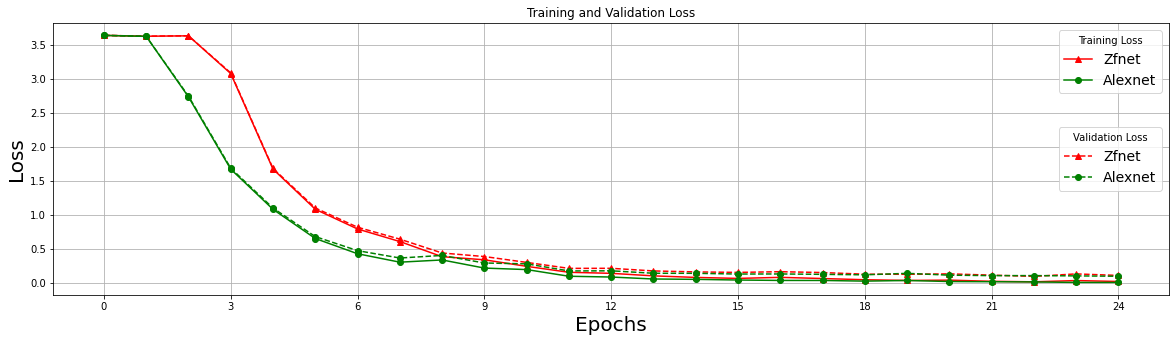

In [ ]:
lines = []
fig, ax = plt.subplots(figsize=(20, 5))

lines += ax.plot(train_loss["Zfnet"],label="Zfnet train_loss",marker = '^', color = 'red')
lines += ax.plot(val_loss["Zfnet"],label = "Zfnet val_loss",marker = '^',linestyle='--', color  = 'red')
lines += ax.plot(train_loss["Alexnet"],label="Alexnet train_loss",marker = 'o', color = 'green')
lines += ax.plot(val_loss["Alexnet"],label = "Alexnet val_loss",marker = 'o',linestyle='--', color = 'green')
plt.grid()
ax.legend(lines[0:3:2],['Zfnet','Alexnet'],title = "Training Loss",fontsize =14)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss') 
plt.xticks(np.arange(0, 25, step=3))  # Set label locations.
from matplotlib.legend import Legend
leg = Legend(ax, lines[1:4:2], ['Zfnet', 'Alexnet'],
             loc='center right',title = "Validation Loss",fontsize =14)
ax.add_artist(leg);

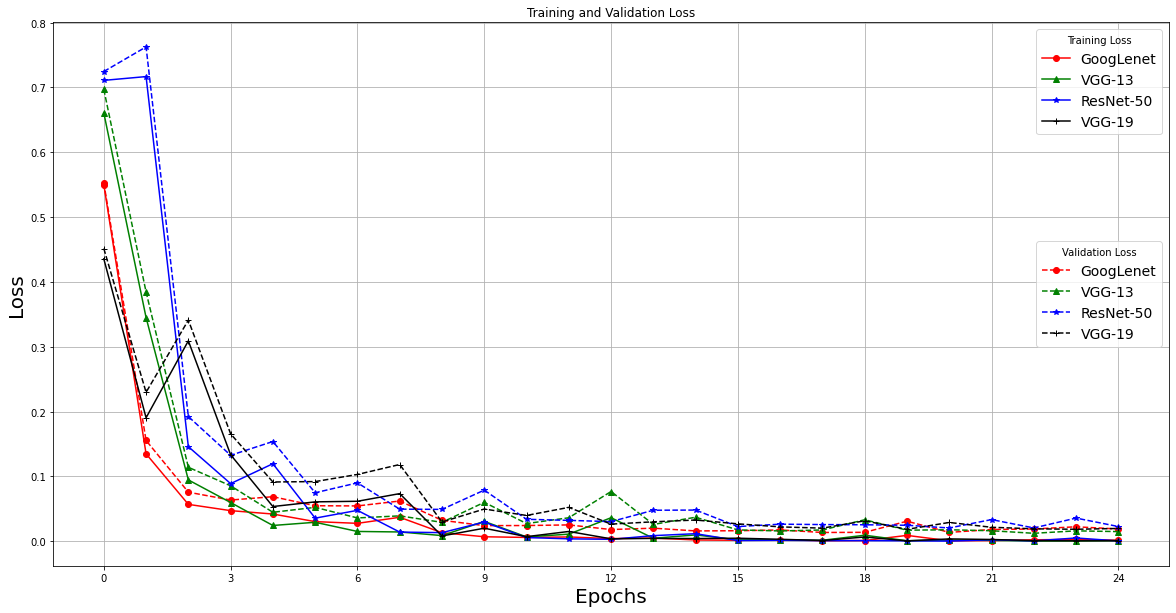

In [ ]:
lines = []
fig, ax = plt.subplots(figsize=(20, 10))

lines += ax.plot(train_loss["Googlenet"],label="train_loss",marker = 'o',color = 'red')
lines += ax.plot(val_loss["Googlenet"],label = "val_loss",marker = 'o',linestyle='--',color = 'red')
lines += ax.plot(train_loss["vgg13"],label="train_loss",marker = '^',color = 'green')
lines += ax.plot(val_loss["vgg13"],label = "val_loss",marker = '^',linestyle='--',color = 'green')
lines += ax.plot(train_loss["Resnet50"],label="train_loss",marker = '*',color = 'blue')
lines += ax.plot(val_loss["Resnet50"],label = "val_loss",marker = '*',linestyle='--',color = 'blue')
lines += ax.plot(train_loss["vgg19"],label="train_loss",marker = '+',color = 'black')
lines += ax.plot(val_loss["vgg19"],label = "val_loss",marker = '+',linestyle='--',color = 'black')
plt.grid()
ax.legend(lines[0:7:2],['GoogLenet','VGG-13','ResNet-50','VGG-19'],title = "Training Loss",fontsize =14)
#plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Training and Validation Loss')
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.xticks(np.arange(0, 25, step=3))  # Set label locations.
leg = Legend(ax, lines[1:8:2], ['GoogLenet','VGG-13','ResNet-50','VGG-19'],loc='center right',title = "Validation Loss",fontsize =14)
ax.add_artist(leg);


Text(0.5, 1.0, 'Training and Validation Loss')

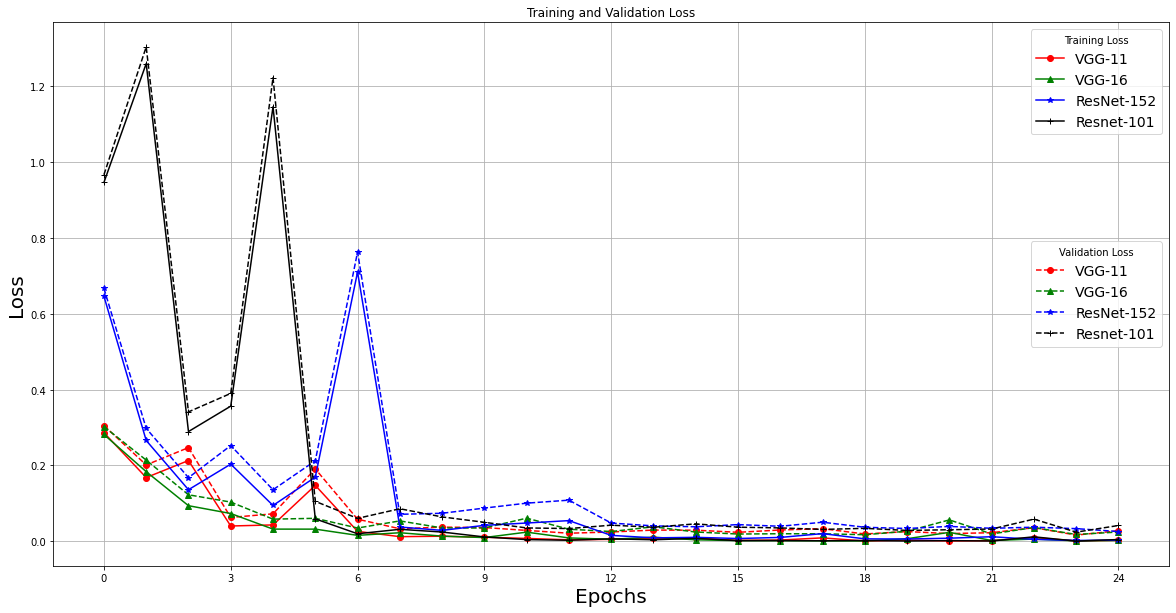

In [ ]:
lines = []
fig, ax = plt.subplots(figsize=(20, 10))

lines += ax.plot(train_loss["VGG11"],label="train_loss",marker = 'o',color = 'red')
lines += ax.plot(val_loss["VGG11"],label = "val_loss",marker = 'o',linestyle='--',color = 'red')
lines += ax.plot(train_loss["VGG16"],label="train_loss",marker = '^',color = 'green')
lines += ax.plot(val_loss["VGG16"],label = "val_loss",marker = '^',linestyle='--',color = 'green')
lines += ax.plot(train_loss["Resnet152"],label="train_loss",marker = '*',color = 'blue')
lines += ax.plot(val_loss["Resnet152"],label = "val_loss",marker = '*',linestyle='--',color = 'blue')
lines += ax.plot(train_loss["Resnet101"],label="train_loss",marker = '+',color = 'black')
lines += ax.plot(val_loss["Resnet101"],label = "val_loss",marker = '+',linestyle='--',color = 'black')
plt.grid()
ax.legend(lines[0:7:2],['VGG-11','VGG-16','ResNet-152','Resnet-101'],title = "Training Loss",fontsize =14)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.xticks(np.arange(0, 25, step=3))  # Set label locations.
leg = Legend(ax, lines[1:8:2], ['VGG-11','VGG-16','ResNet-152','Resnet-101'],loc='center right',title = "Validation Loss",fontsize =14)
ax.add_artist(leg);
plt.title('Training and Validation Loss') 

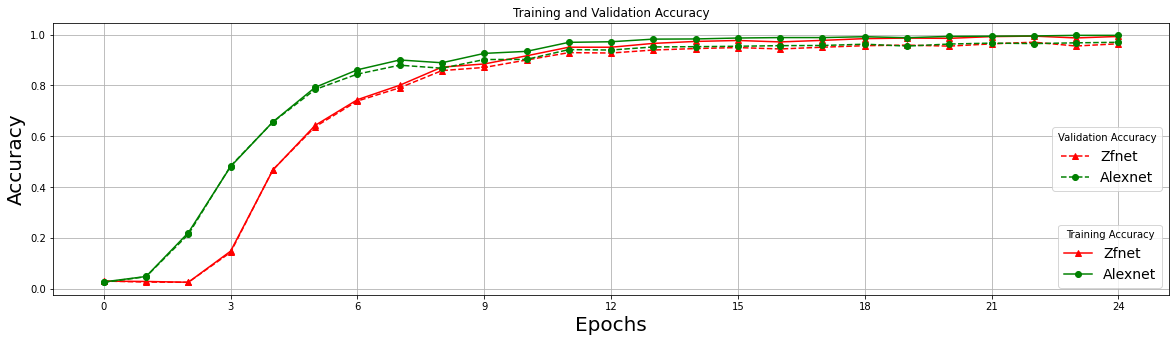

In [ ]:
lines = []
fig, ax = plt.subplots(figsize=(20, 5))

lines += ax.plot(train_acc["Zfnet"],label="Zfnet train_acc",marker = '^',color= 'red')
lines += ax.plot(val_acc["Zfnet"],label = "Zfnet val_acc",marker = '^',linestyle='--',color = 'red')
lines += ax.plot(train_acc["Alexnet"],label="Alexnet train_acc",marker = 'o',color = 'green')
lines += ax.plot(val_acc["Alexnet"],label = "Alexnet val_acc",marker = 'o',linestyle='--',color = 'green')
plt.grid()
ax.legend(lines[0:3:2],['Zfnet','Alexnet'],title = "Training Accuracy",loc = 'lower right',fontsize = 14)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy') 
plt.xticks(np.arange(0, 25, step=3))  # Set label locations.
from matplotlib.legend import Legend
leg = Legend(ax, lines[1:4:2], ['Zfnet', 'Alexnet'],
             loc='center right',title = "Validation Accuracy",fontsize =14)
ax.add_artist(leg);

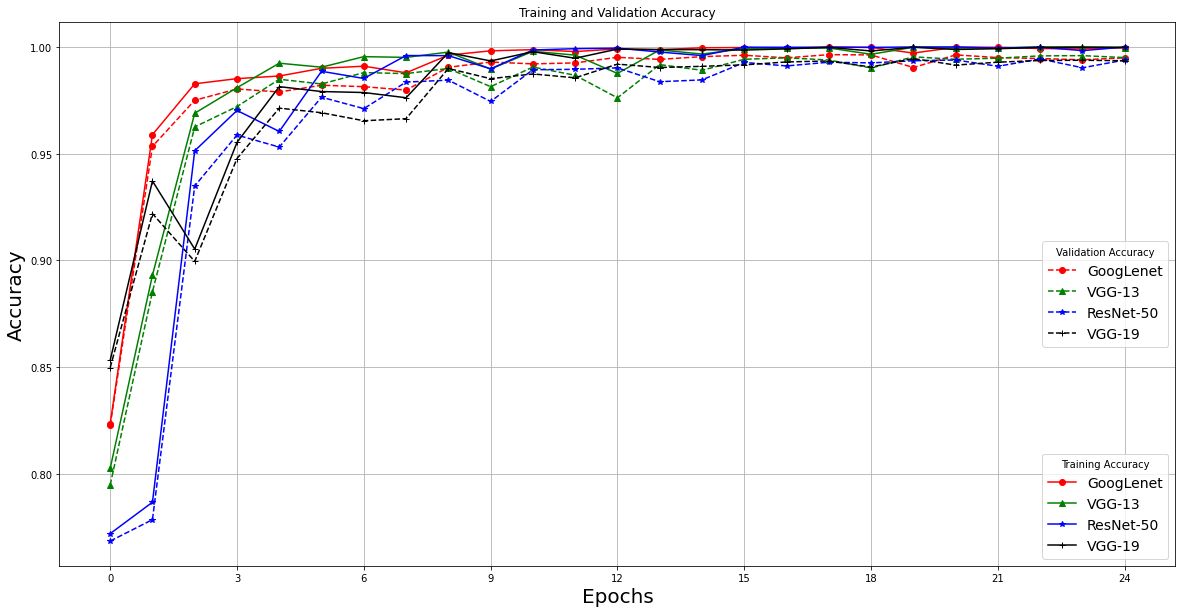

In [ ]:
lines = []
fig, ax = plt.subplots(figsize=(20, 10))

lines += ax.plot(train_acc["Googlenet"],label="train_acc",marker = 'o',color = 'red')
lines += ax.plot(val_acc["Googlenet"],label = "val_acc",marker = 'o',linestyle='--',color = 'red')
lines += ax.plot(train_acc["vgg13"],label="train_acc",marker = '^',color = 'green')
lines += ax.plot(val_acc["vgg13"],label = "val_acc",marker = '^',linestyle='--',color = 'green')
lines += ax.plot(train_acc["Resnet50"],label="train_acc",marker = '*',color = 'blue')
lines += ax.plot(val_acc["Resnet50"],label = "val_acc",marker = '*',linestyle='--',color = 'blue')
lines += ax.plot(train_acc["vgg19"],label="train_acc",marker = '+',color = 'black')
lines += ax.plot(val_acc["vgg19"],label = "val_acc",marker = '+',linestyle='--',color = 'black')
plt.grid()
ax.legend(lines[0:7:2],['GoogLenet','VGG-13','ResNet-50','VGG-19'],title = "Training Accuracy",loc='lower right',fontsize =14)
#plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Training and Validation Accuracy')
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.xticks(np.arange(0, 25, step=3))  # Set label locations.
leg = Legend(ax, lines[1:8:2], ['GoogLenet','VGG-13','ResNet-50','VGG-19'],loc='center right',title = "Validation Accuracy",fontsize =14)
ax.add_artist(leg);

Text(0.5, 1.0, 'Training and Validation Accuracy')

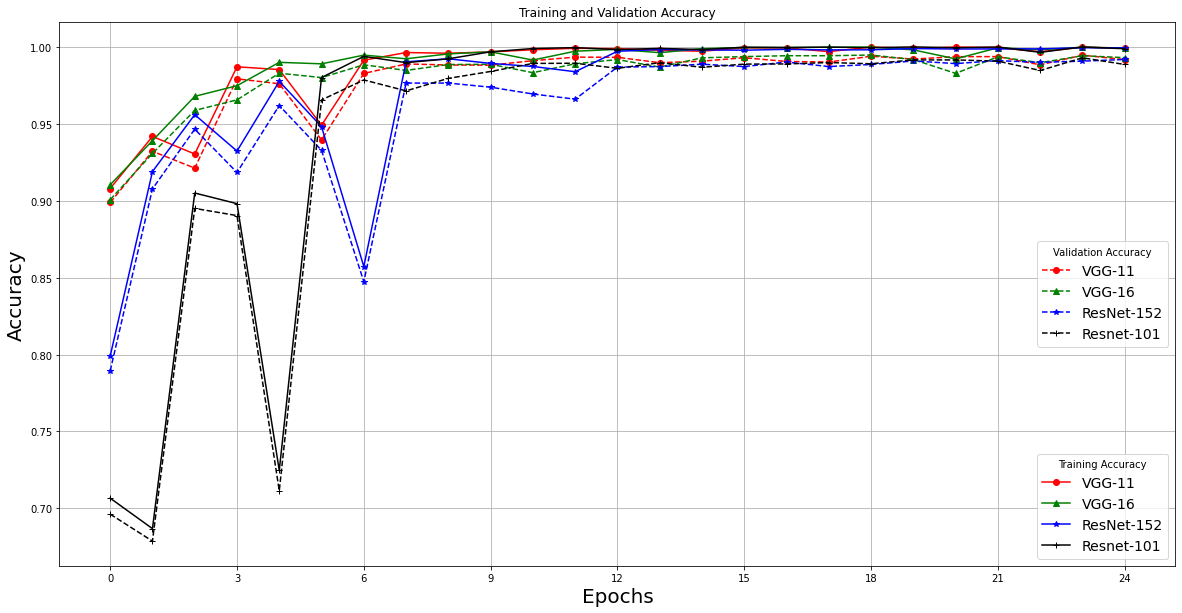

In [ ]:
lines = []
fig, ax = plt.subplots(figsize=(20, 10))

lines += ax.plot(train_acc["vgg11"],label="train_acc",marker = 'o',color = 'red')
lines += ax.plot(val_acc["VGG11"],label = "val_acc",marker = 'o',linestyle='--',color = 'red')
lines += ax.plot(train_acc["vgg16"],label="train_acc",marker = '^',color = 'green')
lines += ax.plot(val_acc["VGG16"],label = "val_acc",marker = '^',linestyle='--',color = 'green')
lines += ax.plot(train_acc["Resnet152"],label="train_acc",marker = '*',color = 'blue')
lines += ax.plot(val_acc["Resnet152"],label = "val_acc",marker = '*',linestyle='--',color = 'blue')
lines += ax.plot(train_acc["Resnet101"],label="train_acc",marker = '+',color = 'black')
lines += ax.plot(val_acc["Resnet101"],label = "val_acc",marker = '+',linestyle='--',color = 'black')
plt.grid()
ax.legend(lines[0:7:2],['VGG-11','VGG-16','ResNet-152','Resnet-101'],title = "Training Accuracy",loc='lower right',fontsize =14)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.xticks(np.arange(0, 25, step=3))  # Set label locations.
leg = Legend(ax, lines[1:8:2], ['VGG-11','VGG-16','ResNet-152','Resnet-101'],loc='center right',title = "Validation Accuracy",fontsize =14)
ax.add_artist(leg);
plt.title('Training and Validation Accuracy') 

Text(0.5, 1.0, 'Training and Validation Loss Alexnet')

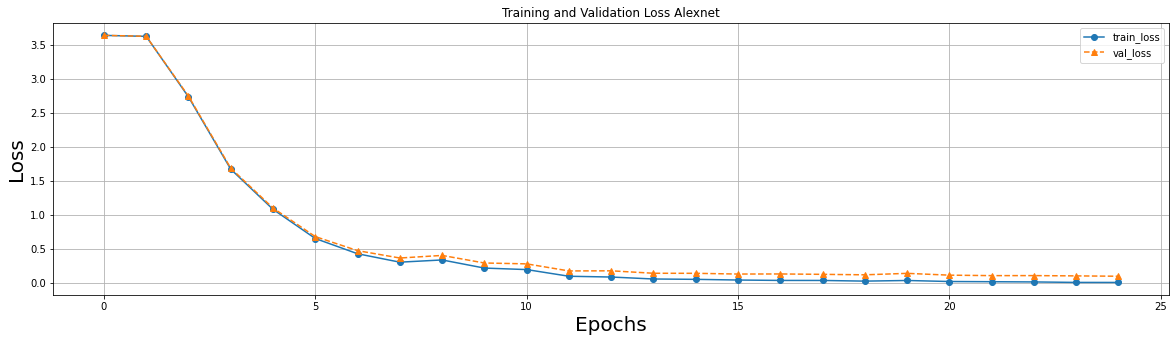

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["Alexnet"],label="train_loss", marker = 'o')
plt.plot(val_loss["Alexnet"],label = "val_loss", marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss Alexnet') 

Text(0.5, 1.0, 'Training and Validation Loss GoogLeNet')

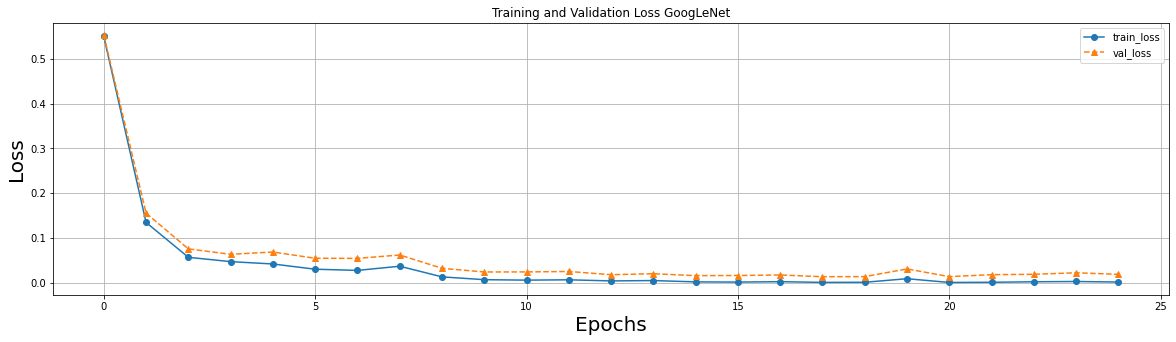

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["Googlenet"],label="train_loss",marker = 'o')
plt.plot(val_loss["Googlenet"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss GoogLeNet') 

Text(0.5, 1.0, 'Training and Validation Loss VGG11')

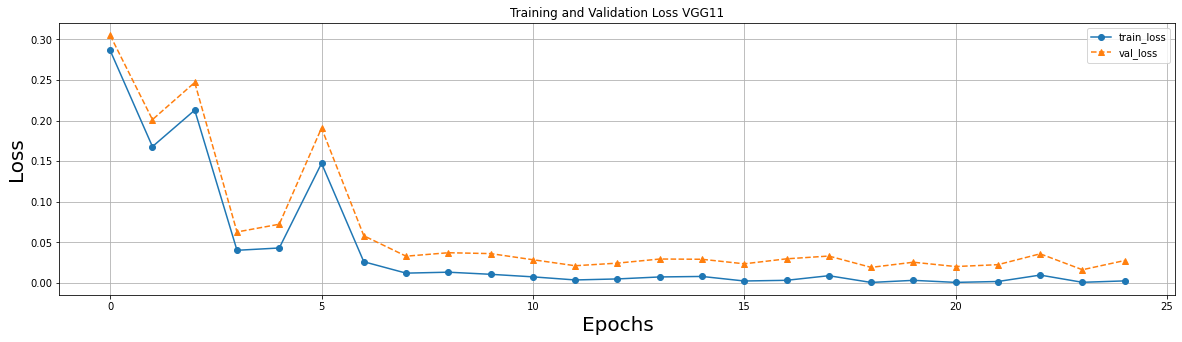

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["VGG11"],label="train_loss",marker = 'o')
plt.plot(val_loss["VGG11"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss VGG11') 

Text(0.5, 1.0, 'Training and Validation Loss VGG13')

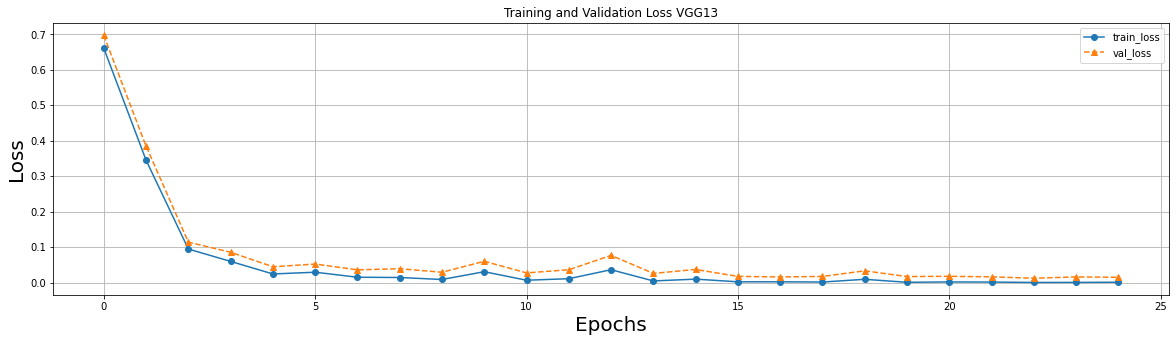

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["vgg13"],label="train_loss",marker = 'o')
plt.plot(val_loss["vgg13"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss VGG13') 

Text(0.5, 1.0, 'Training and Validation Loss VGG16')

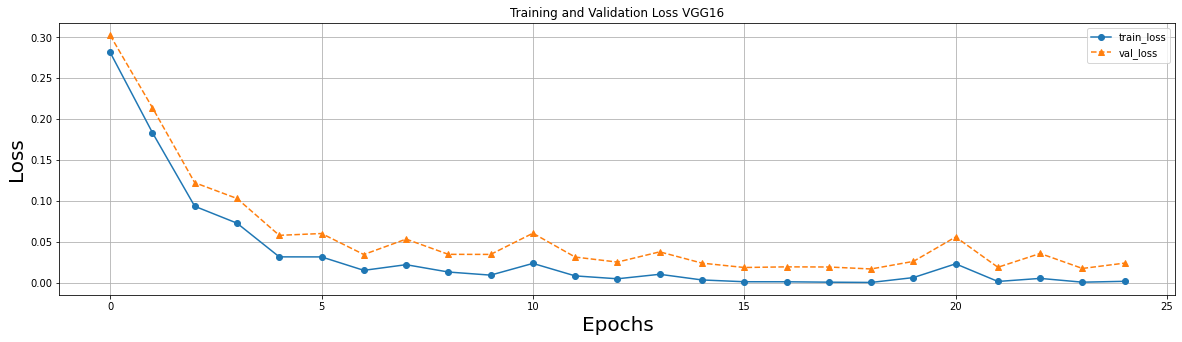

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["VGG16"],label="train_loss",marker = 'o')
plt.plot(val_loss["VGG16"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss VGG16') 

Text(0.5, 1.0, 'Training and Validation Loss VGG19')

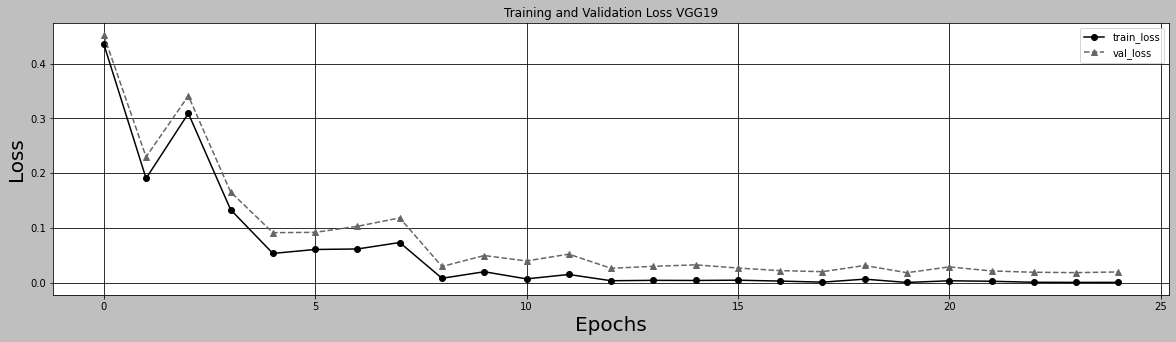

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["vgg19"],label="train_loss",marker = 'o')
plt.plot(val_loss["vgg19"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss VGG19') 

Text(0.5, 1.0, 'Training and Validation Loss Zfnet')

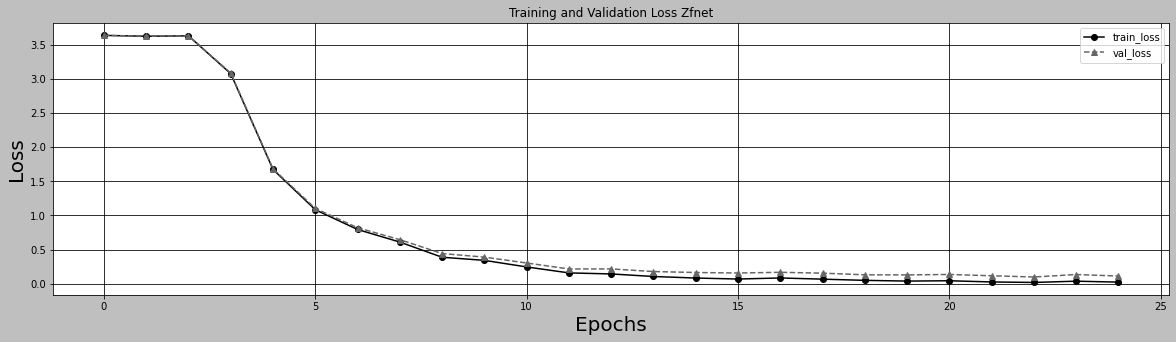

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["Zfnet"],label="train_loss",marker = 'o')
plt.plot(val_loss["Zfnet"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss Zfnet') 

Text(0.5, 1.0, 'Training and Validation Loss ResNet50')

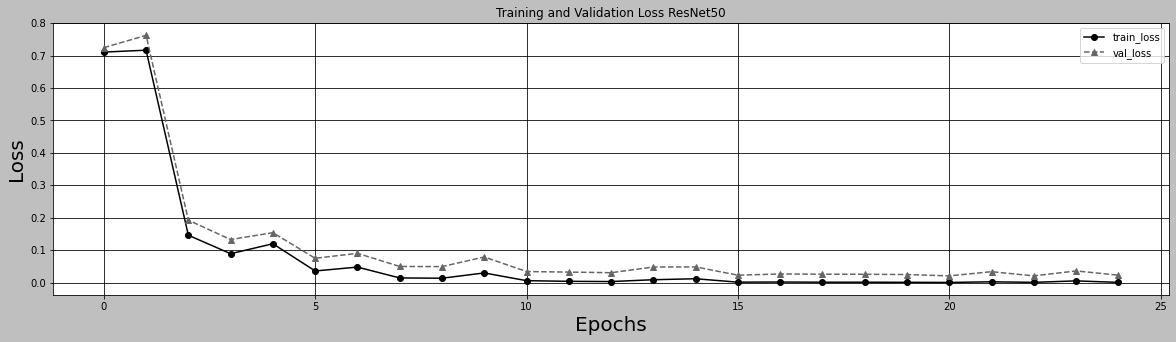

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["Resnet50"],label="train_loss",marker = 'o')
plt.plot(val_loss["Resnet50"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss ResNet50') 

Text(0.5, 1.0, 'Training and Validation Loss ResNet101')

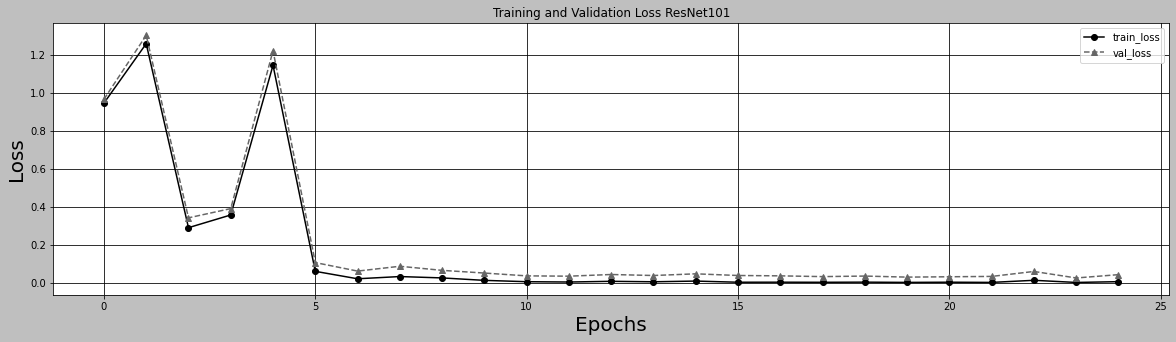

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["Resnet101"],label="train_loss",marker = 'o')
plt.plot(val_loss["Resnet101"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss ResNet101') 

Text(0.5, 1.0, 'Training and Validation Loss ResNet152')

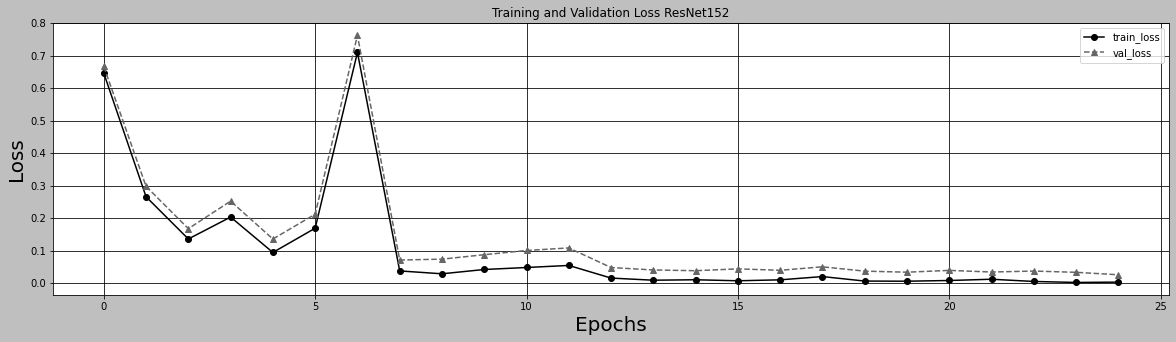

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_loss["Resnet152"],label="train_loss",marker = 'o')
plt.plot(val_loss["Resnet152"],label = "val_loss",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Loss ResNet152') 

Text(0.5, 1.0, 'Training Loss')

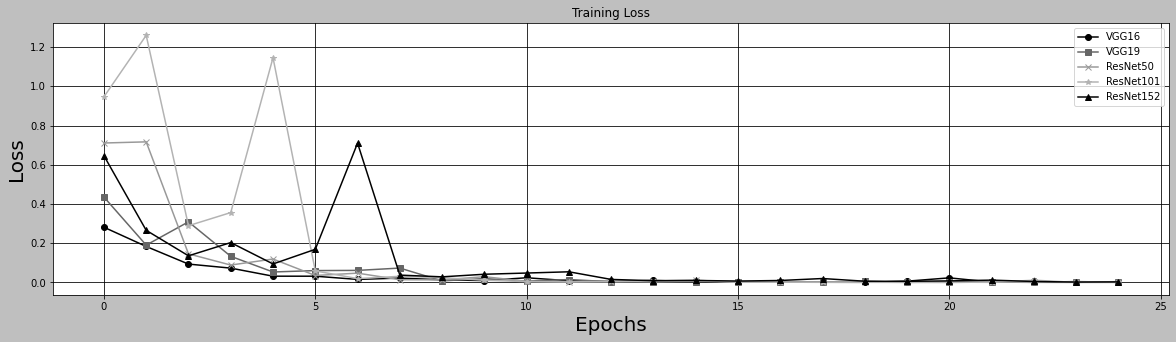

In [ ]:
plt.figure(figsize=(20, 5))
#plt.plot(train_loss["Alexnet"],label="train_loss",marker = 'o')

#plt.plot(train_loss["Alexnet"], label="AlexNet",marker = 'o')
#plt.plot(train_loss["Zfnet"], label = "ZFNet",marker = 's')
#plt.plot(train_loss["Googlenet"], label = "GoogLeNet", marker = 'x')
#plt.plot(train_loss["VGG11"], label = "VGG11",marker = '^')
#plt.plot(train_loss["vgg13"], label = "VGG13",marker = '*')
plt.plot(train_loss["VGG16"], label = "VGG16",marker = 'o')
plt.plot(train_loss["vgg19"], label = "VGG19", marker = 's')
plt.plot(train_loss["Resnet50"], label = "ResNet50", marker = 'x')
plt.plot(train_loss["Resnet101"], label = "ResNet101", marker = '*')
plt.plot(train_loss["Resnet152"], label = "ResNet152", marker = '^')
plt.plot(val_loss["VGG16"],label = "val_loss",marker = '^',linestyle='--')
plt.plot(val_loss["vgg19"],label = "val_loss",marker = '^',linestyle='--')
plt.plot(val_loss["Resnet50"],label = "val_loss",marker = '^',linestyle='--')
plt.plot(val_loss["Resnet101"],label = "val_loss",marker = '^',linestyle='--')
plt.plot(val_loss["Resnet152"],label = "val_loss",marker = '^',linestyle='--')

plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training Loss') 
#plt.show()

Text(0.5, 1.0, 'Training Loss')

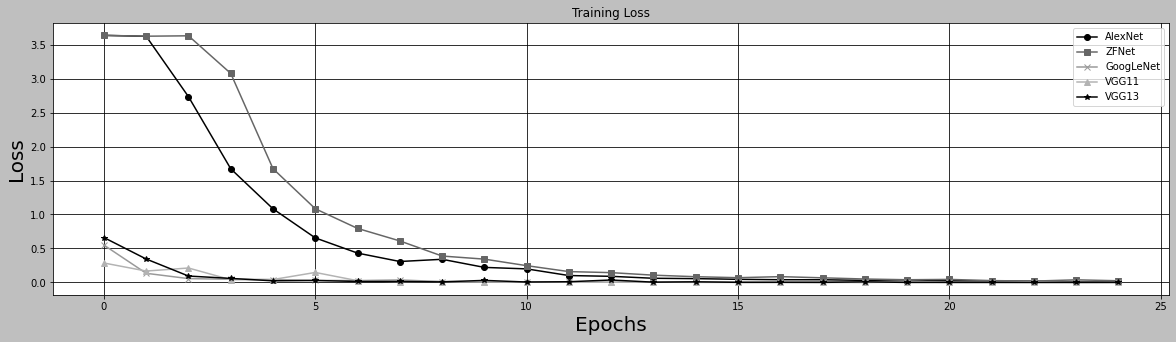

In [ ]:
plt.figure(figsize=(20, 5))
#plt.plot(train_loss["Alexnet"],label="train_loss",marker = 'o')

plt.plot(train_loss["Alexnet"], label="AlexNet",marker = 'o')
plt.plot(train_loss["Zfnet"], label = "ZFNet",marker = 's')
plt.plot(train_loss["Googlenet"], label = "GoogLeNet", marker = 'x')
plt.plot(train_loss["VGG11"], label = "VGG11",marker = '^')
plt.plot(train_loss["vgg13"], label = "VGG13",marker = '*')
#plt.plot(train_loss["VGG16"], label = "VGG16",marker = 's')
#plt.plot(train_loss["vgg19"], label = "VGG19", marker = '+')
#plt.plot(train_loss["Resnet50"], label = "ResNet50", marker = '+')
#plt.plot(train_loss["Resnet101"], label = "ResNet101", marker = '+')
#plt.plot(train_loss["Resnet152"], label = "ResNet152", marker = '+')

plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training Loss') 
#plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy AlexNet')

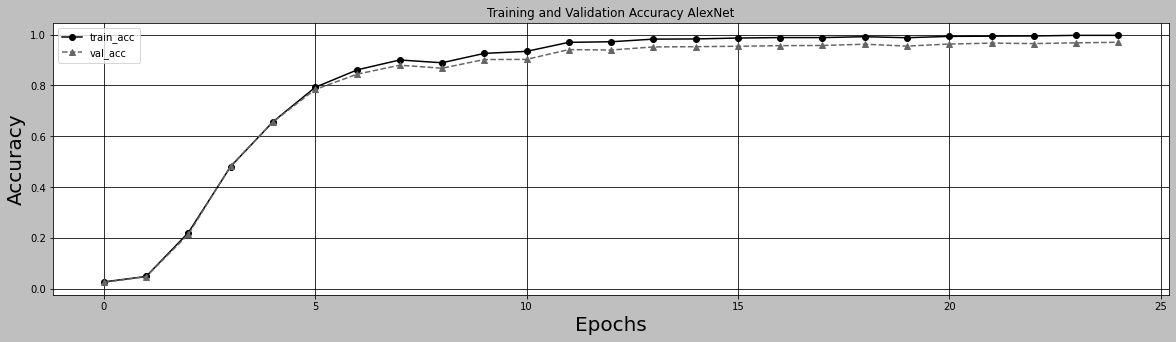

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["Alexnet"],label="train_acc",marker = 'o')
plt.plot(val_acc["Alexnet"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy AlexNet') 

Text(0.5, 1.0, 'Training and Validation Accuracy GoogLeNet')

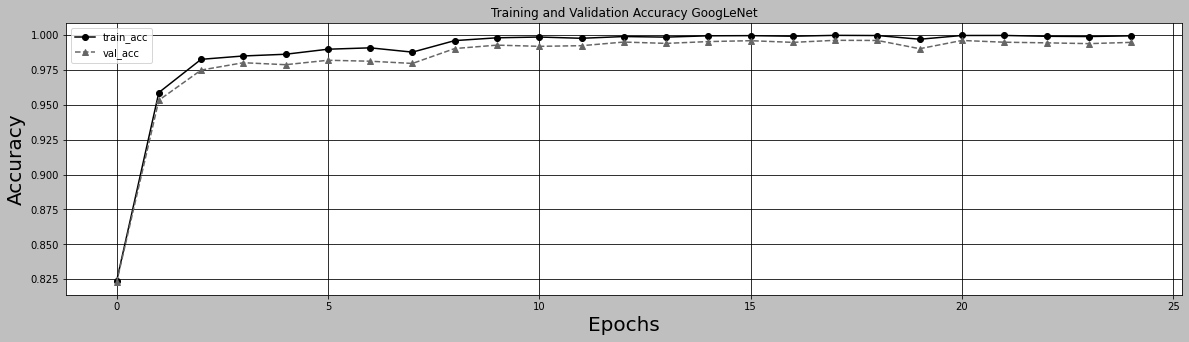

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["Googlenet"],label="train_acc",marker = 'o')
plt.plot(val_acc["Googlenet"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy GoogLeNet') 

Text(0.5, 1.0, 'Training and Validation Accuracy VGG11')

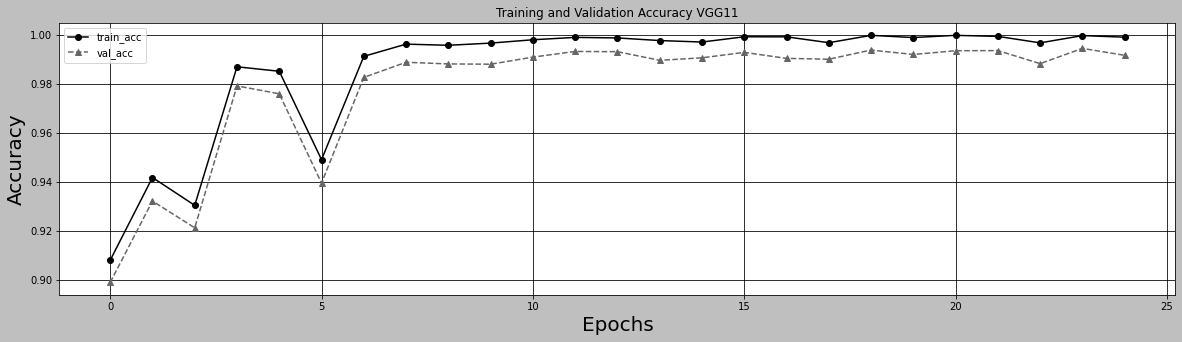

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["vgg11"],label="train_acc",marker = 'o')
plt.plot(val_acc["VGG11"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy VGG11') 

Text(0.5, 1.0, 'Training and Validation Accuracy VGG13')

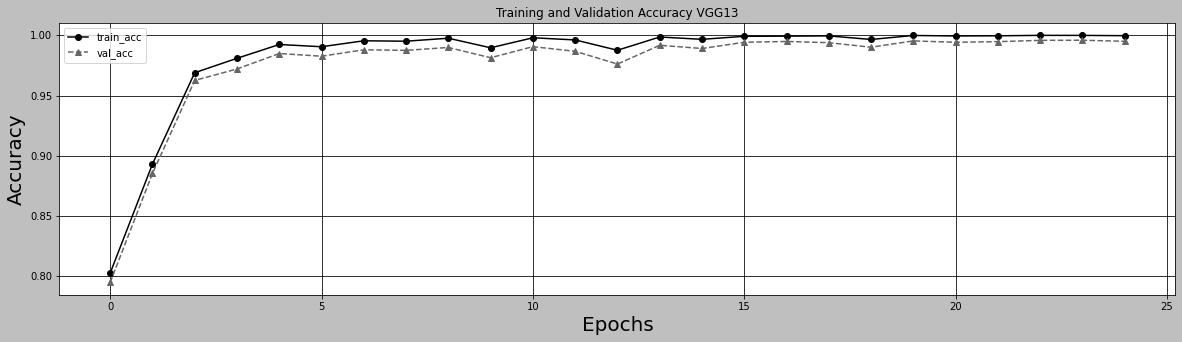

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["vgg13"],label="train_acc",marker = 'o')
plt.plot(val_acc["vgg13"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy VGG13') 

Text(0.5, 1.0, 'Training and Validation Accuracy VGG16')

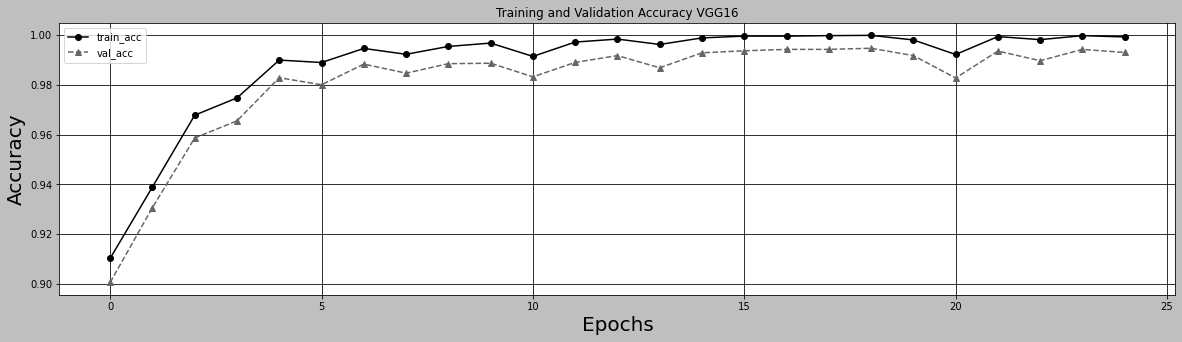

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["vgg16"],label="train_acc",marker = 'o')
plt.plot(val_acc["VGG16"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy VGG16') 

Text(0.5, 1.0, 'Training and Validation Accuracy VGG19')

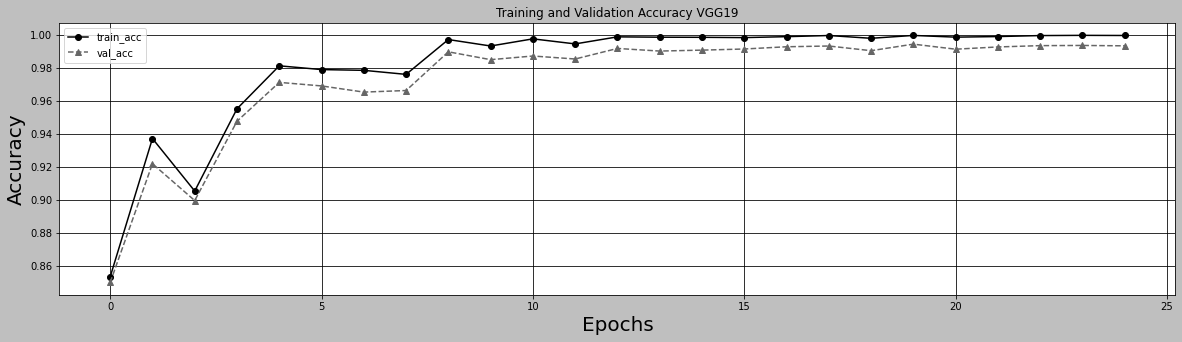

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["vgg19"],label="train_acc",marker = 'o')
plt.plot(val_acc["vgg19"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy VGG19') 

Text(0.5, 1.0, 'Training and Validation Accuracy ZfNet')

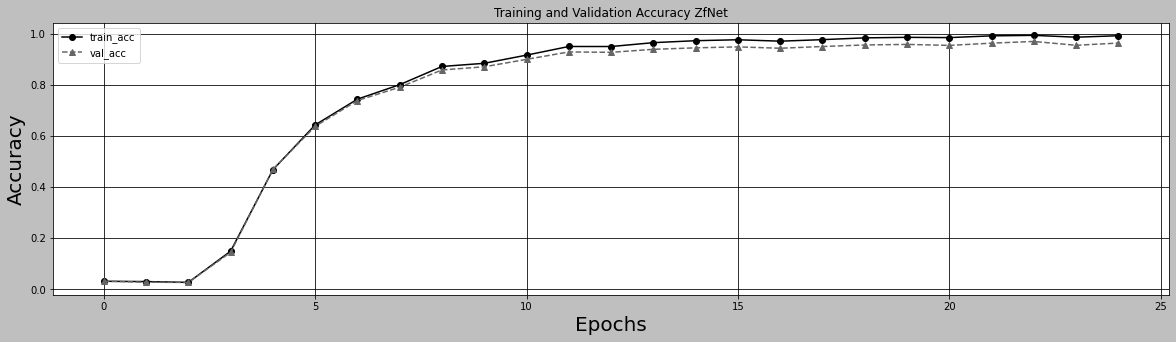

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["Zfnet"],label="train_acc",marker = 'o')
plt.plot(val_acc["Zfnet"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy ZfNet') 

Text(0.5, 1.0, 'Training and Validation Accuracy ResNet50')

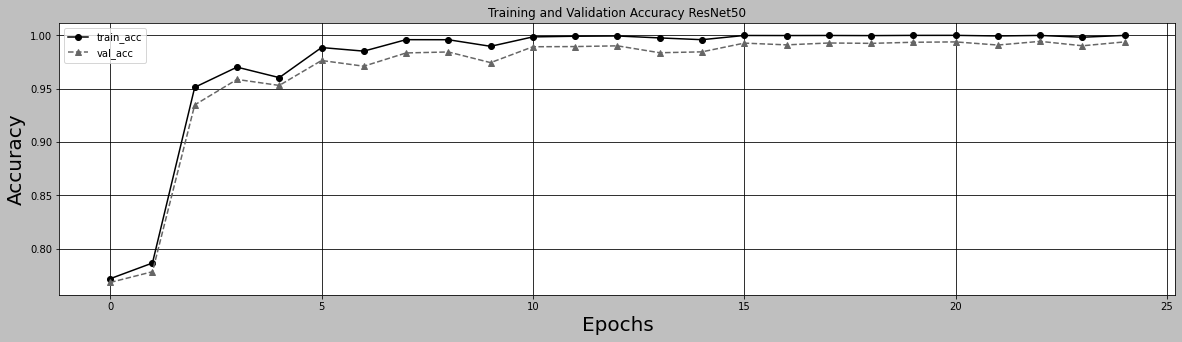

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["Resnet50"],label="train_acc",marker = 'o')
plt.plot(val_acc["Resnet50"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy ResNet50') 

Text(0.5, 1.0, 'Training and Validation Accuracy ResNet101')

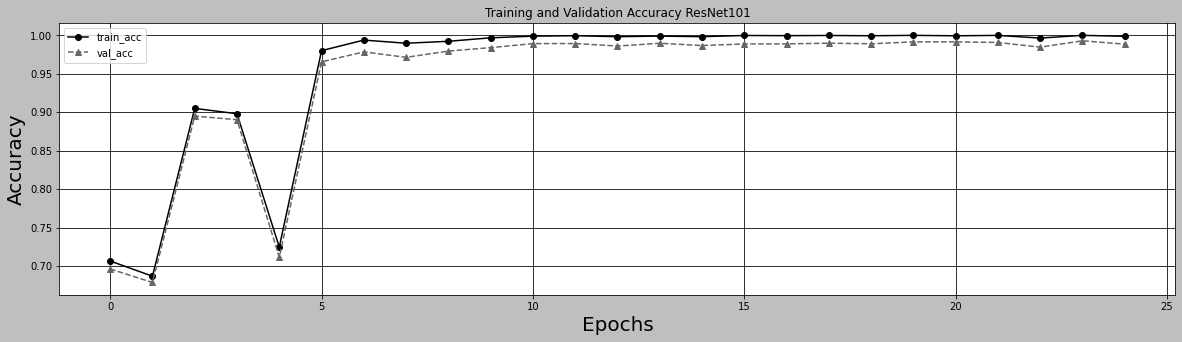

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["Resnet101"],label="train_acc",marker = 'o')
plt.plot(val_acc["Resnet101"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy ResNet101') 

Text(0.5, 1.0, 'Training and Validation Accuracy ResNet152')

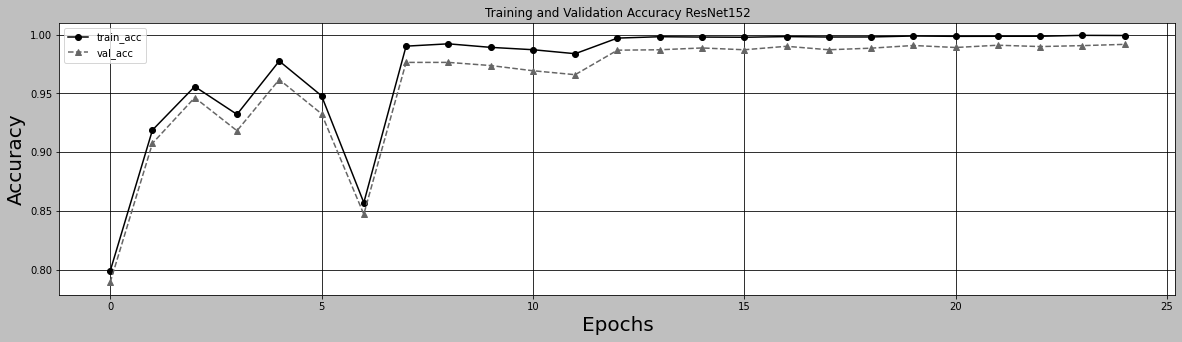

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(train_acc["Resnet152"],label="train_acc",marker = 'o')
plt.plot(val_acc["Resnet152"],label = "val_acc",marker = '^',linestyle='--')
plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training and Validation Accuracy ResNet152') 

Text(0.5, 1.0, 'Training Accuracy')

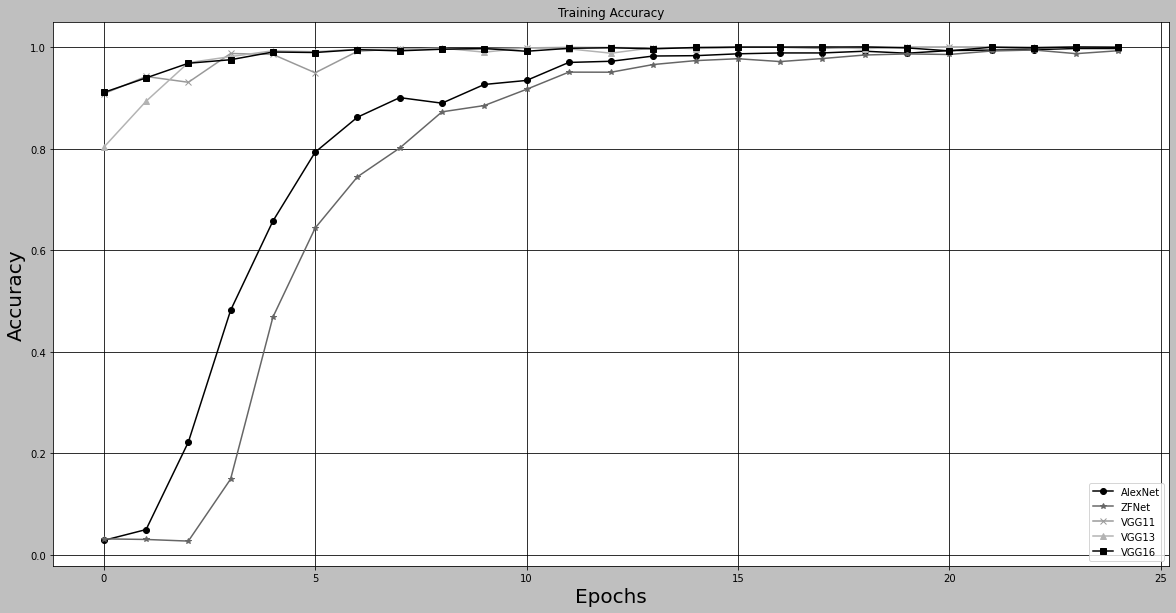

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(train_loss["Alexnet"],label="train_loss",marker = 'o')

plt.plot(train_acc["Alexnet"], label="AlexNet",marker = 'o')
plt.plot(train_acc["Zfnet"], label="ZFNet",marker = '*')
plt.plot(train_acc["vgg11"], label="VGG11",marker = 'x')
plt.plot(train_acc["vgg13"], label="VGG13",marker = '^')
plt.plot(train_acc["vgg16"], label="VGG16",marker = 's')

#plt.plot(train_acc["vgg19"], label="VGG19",marker = 'o')
#plt.plot(train_acc["Googlenet"], label="GoogLeNet",marker = 's')
#plt.plot(train_acc["Resnet50"], label="ResNet50",marker = 'x')
#plt.plot(train_acc["Resnet101"], label="ResNet101",marker = '*')
#plt.plot(train_acc["Resnet152"], label="ResNet152",marker = '^')


plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training Accuracy') 

Text(0.5, 1.0, 'Training Accuracy')

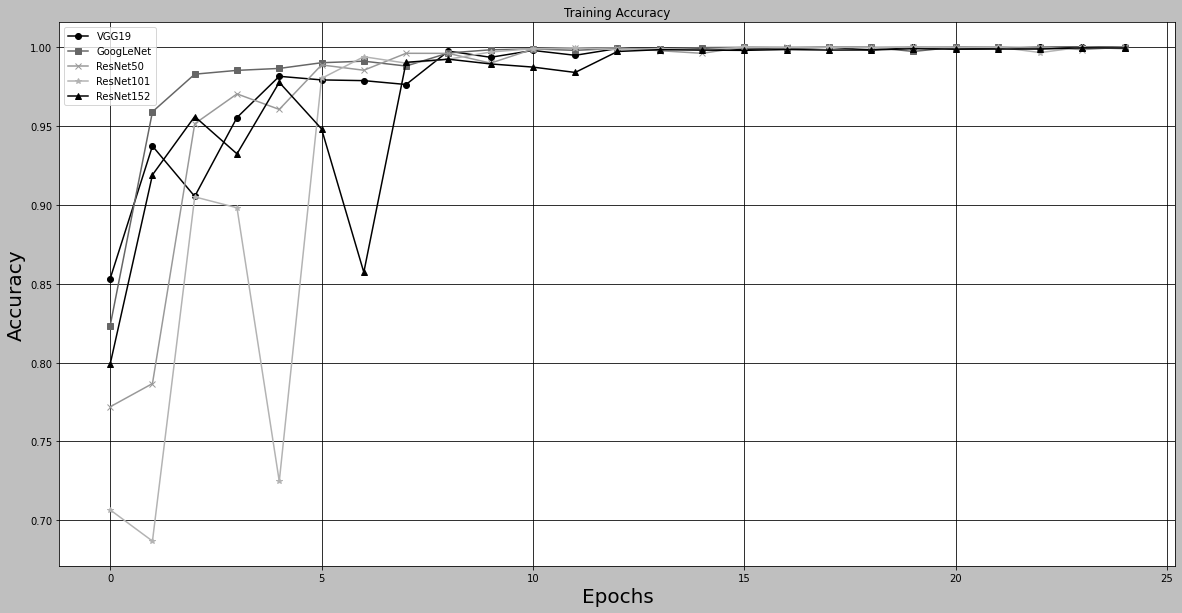

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(train_loss["Alexnet"],label="train_loss",marker = 'o')

#plt.plot(train_acc["Alexnet"], label="AlexNet",marker = 'o')
#plt.plot(train_acc["Zfnet"], label="ZFNet",marker = 's')
#plt.plot(train_acc["vgg11"], label="VGG11",marker = 'x')
#plt.plot(train_acc["vgg13"], label="VGG13",marker = '^')
#plt.plot(train_acc["VGG16"], label="VGG16",marker = '*')

plt.plot(train_acc["vgg19"], label="VGG19",marker = 'o')
plt.plot(train_acc["Googlenet"], label="GoogLeNet",marker = 's')
plt.plot(train_acc["Resnet50"], label="ResNet50",marker = 'x')
plt.plot(train_acc["Resnet101"], label="ResNet101",marker = '*')
plt.plot(train_acc["Resnet152"], label="ResNet152",marker = '^')


plt.grid()
plt.legend()
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
#plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Training Accuracy') 

## Confusion Matrix

In [ ]:
def get_all_preds(model,loader):
    all_preds = torch.tensor([])
    true_lb = torch.tensor([])
    #all_preds = all_preds.cuda()
    #print(all_preds.is_cuda)
    #print(type(all_preds))
    
    for batch in loader:       
        torch.cuda.empty_cache() 
        with torch.no_grad():
            
            images,labels = batch
            preds = model(images)
            
            preds = preds.cpu()
            all_preds = torch.cat((all_preds,preds),dim=0)
            true_lb = torch.cat((true_lb,labels.cpu()),dim=0)
    #print(all_preds[0])
    print(true_lb)
    print(all_preds.argmax(dim=1))      
    return all_preds.argmax(dim=1),true_lb

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def save_confusion_matrix(model,loader,img_path):
    data_preds,true_lb = get_all_preds(model,loader)

    stacked = torch.stack(
        (
            true_lb,
            data_preds
        ), dim = 1
    )

    cmt = torch.zeros(38,38,dtype = torch.int32)

    for p in stacked:
        j,k = p.long().tolist()
        cmt[j,k] = cmt[j,k] + 1

    plt.figure(figsize=(19,19))
    plot_confusion_matrix(cmt, data.classes)
    #cd ./mlruns/0 
    #image_path = 'cmt.png'
    plt.savefig(img_path)
    #mlflow.log_artifact(image_path)
    #cd ../..
    #mlflow.pytorch.log_model(model, "models")
    

tensor([26., 35.,  6.,  ..., 35., 20., 33.])
tensor([26, 35,  6,  ..., 35, 20, 33])
Confusion matrix, without normalization
tensor([[532,   0,   0,  ...,   0,   0,   0],
        [  0, 491,   0,  ...,   0,   0,   0],
        [  0,   0, 429,  ...,   0,   0,   1],
        ...,
        [  0,   0,   0,  ..., 500,   0,   0],
        [  0,   0,   0,  ...,   0, 445,   0],
        [  0,   0,   0,  ...,   0,   0, 493]], dtype=torch.int32)


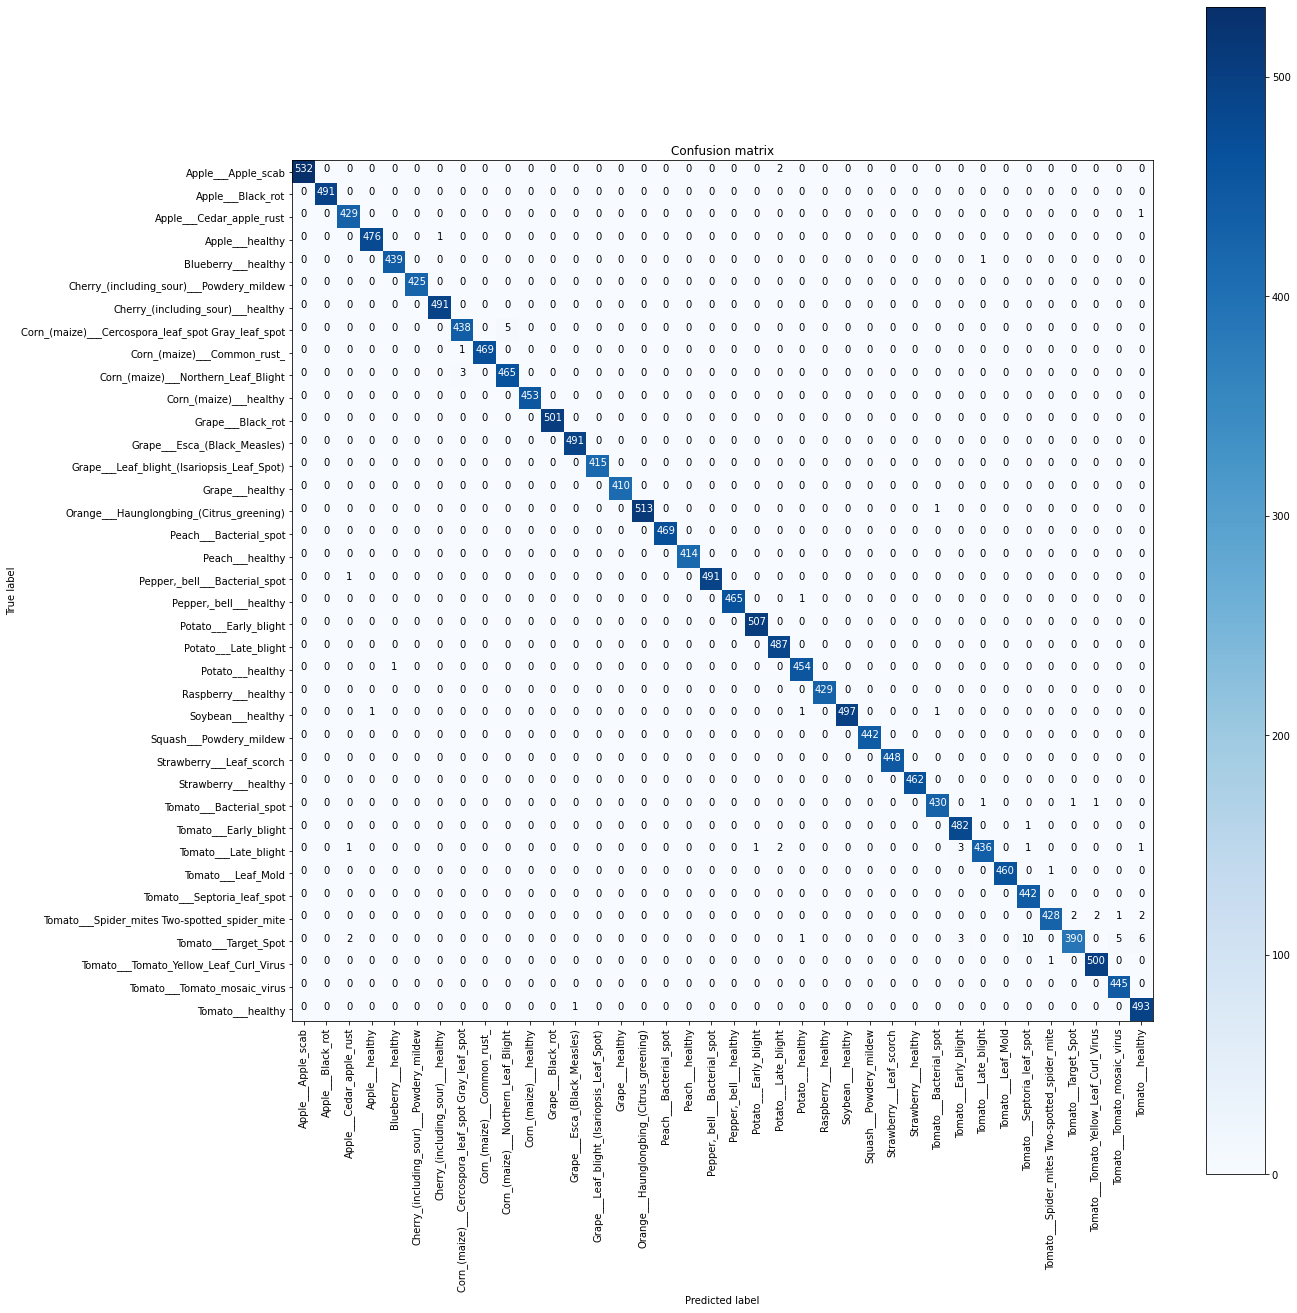

In [ ]:
save_confusion_matrix(model8,test_dl,'/content/CMT1.png')

### Calculating Precision, Recall, F1-Score

In [ ]:
from sklearn import metrics

y_pred,y_true = get_all_preds(model8,test_dl)

# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

tensor([ 8.,  7., 33.,  ..., 31.,  8.,  4.])
tensor([ 8,  7, 33,  ..., 31,  8,  4])
[[532   0   0 ...   0   0   0]
 [  0 491   0 ...   0   0   0]
 [  0   0 429 ...   0   0   1]
 ...
 [  0   0   0 ... 500   0   0]
 [  0   0   0 ...   0 445   0]
 [  0   0   0 ...   0   0 493]]
              precision    recall  f1-score   support

         0.0      1.000     0.996     0.998       534
         1.0      1.000     1.000     1.000       491
         2.0      0.991     0.998     0.994       430
         3.0      0.998     0.998     0.998       477
         4.0      0.998     0.998     0.998       440
         5.0      1.000     1.000     1.000       425
         6.0      0.998     1.000     0.999       491
         7.0      0.991     0.989     0.990       443
         8.0      1.000     0.998     0.999       470
         9.0      0.989     0.994     0.991       468
        10.0      1.000     1.000     1.000       453
        11.0      1.000     1.000     1.000       501
        12.0      0.9